In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
!pip install tldextract


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_phishing.csv')


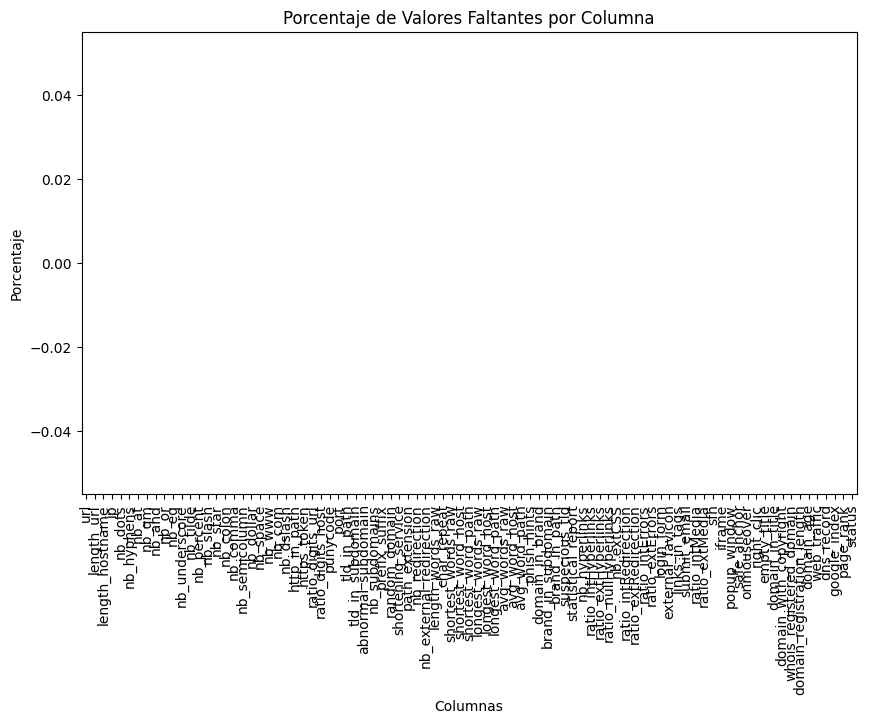

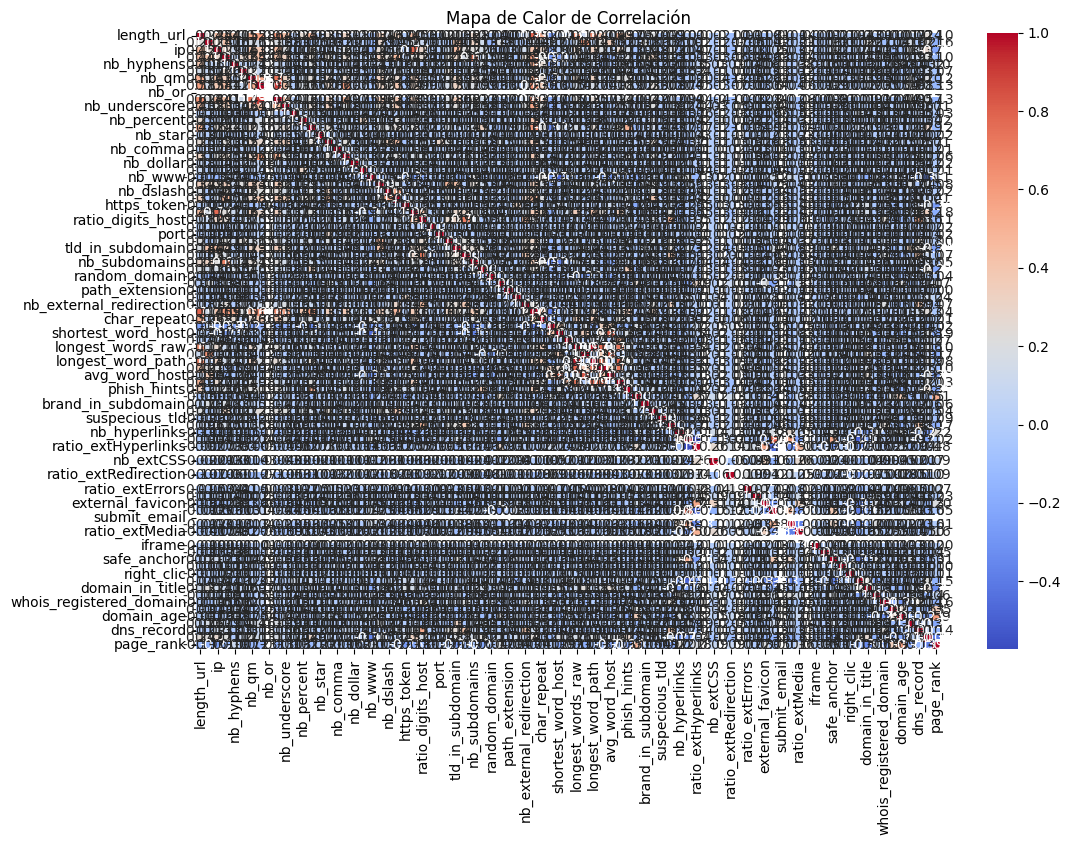

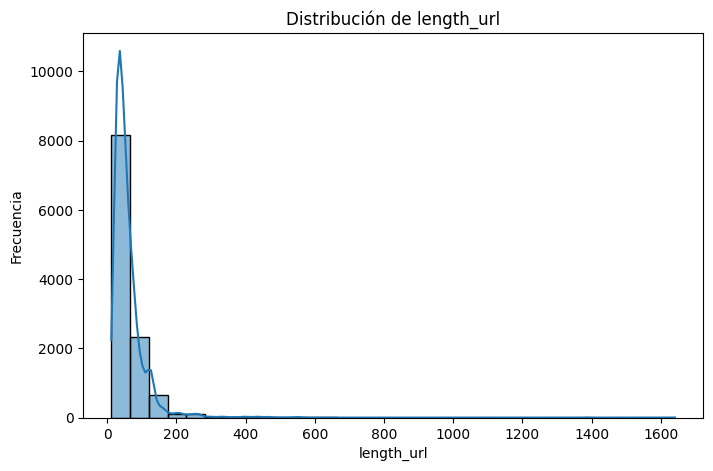

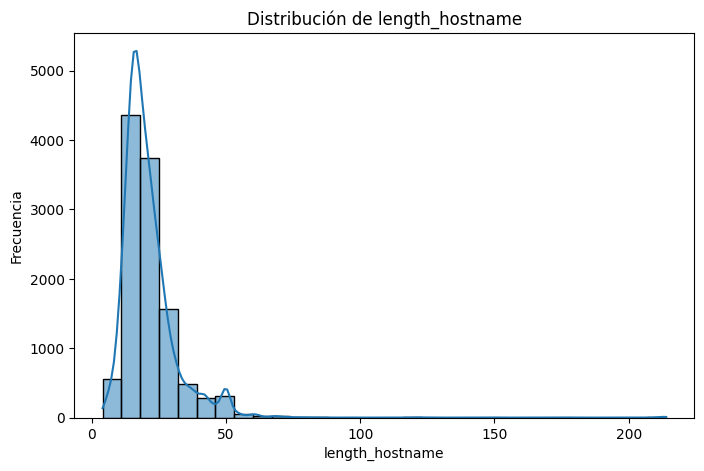

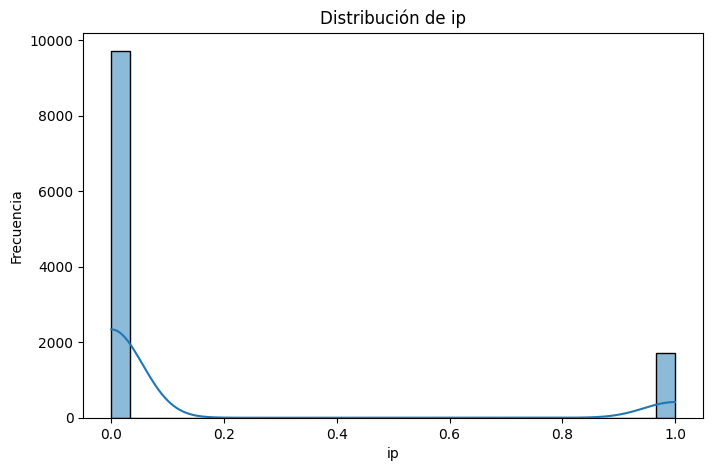

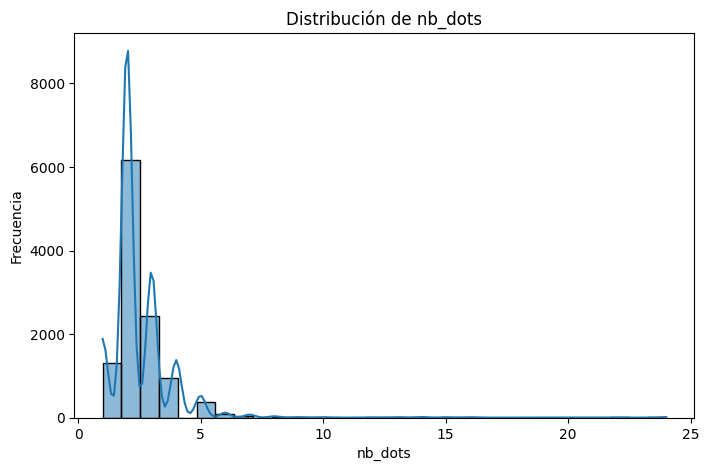

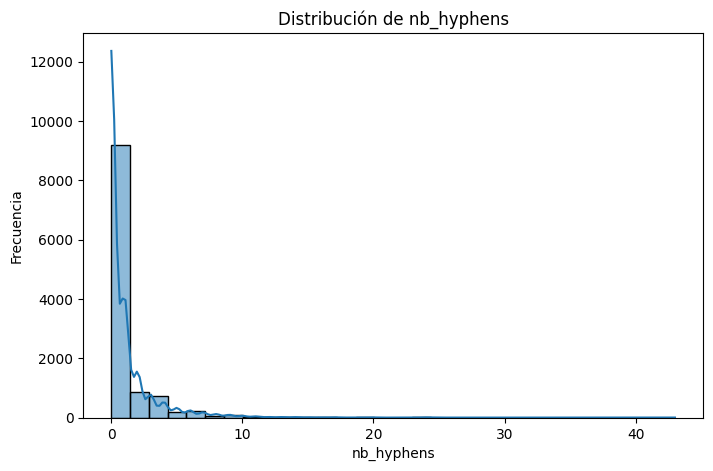

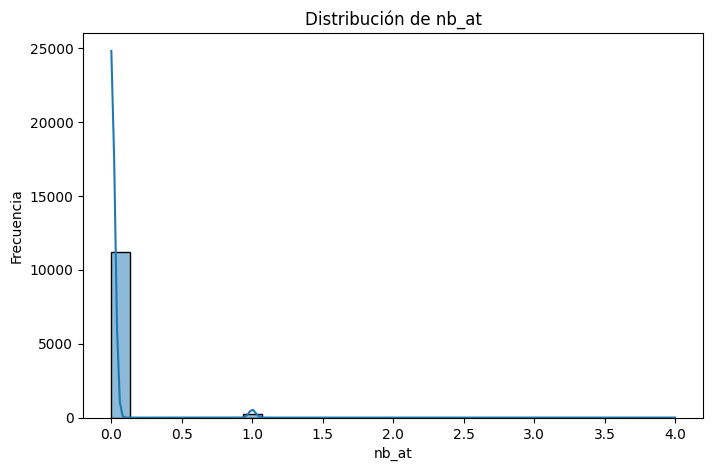

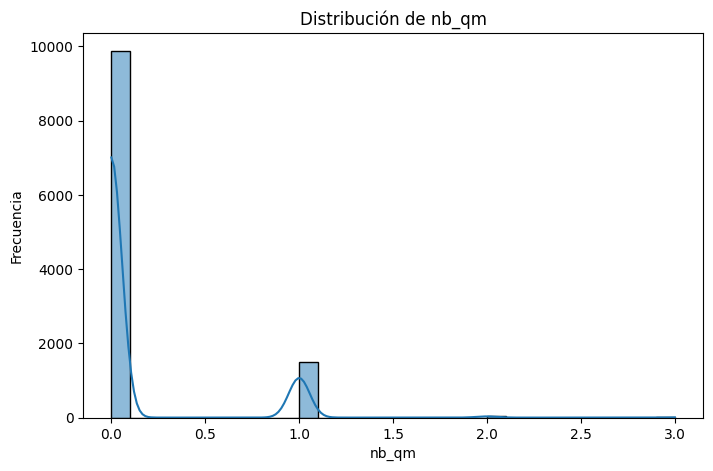

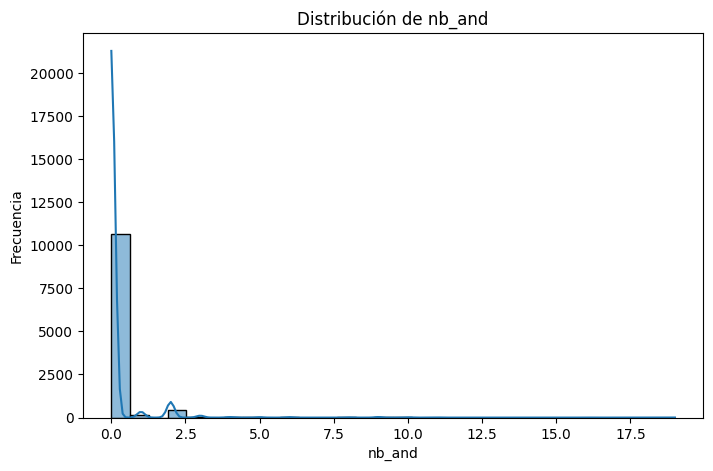

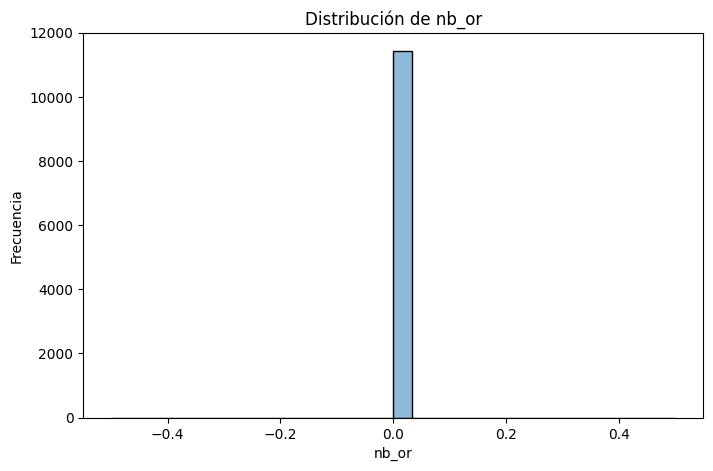

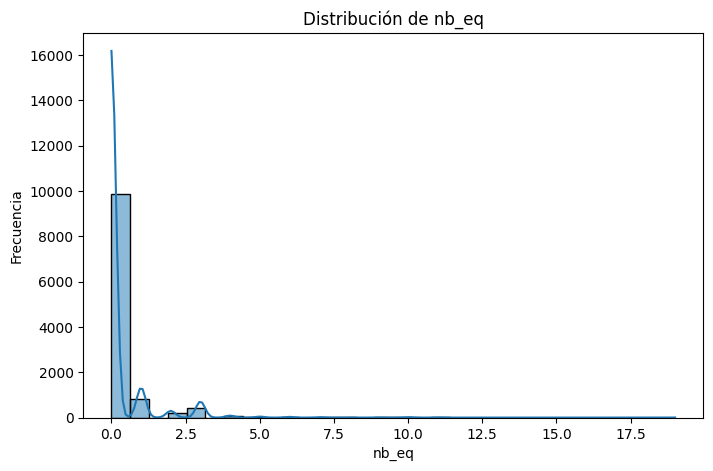

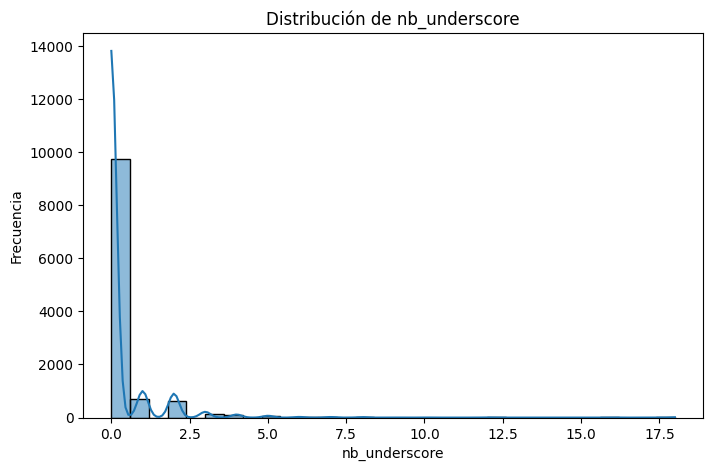

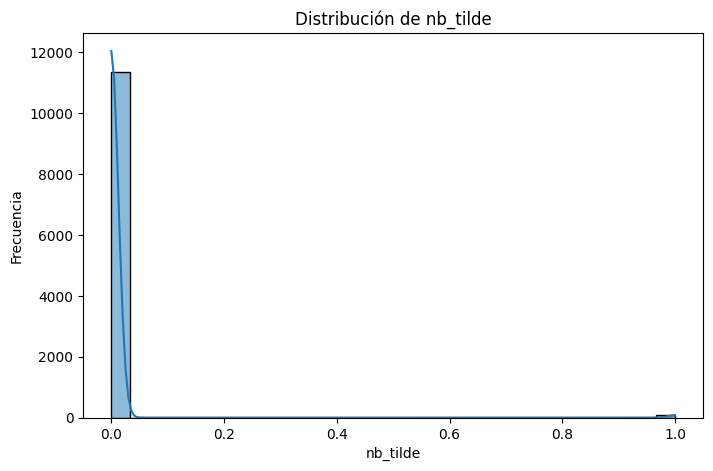

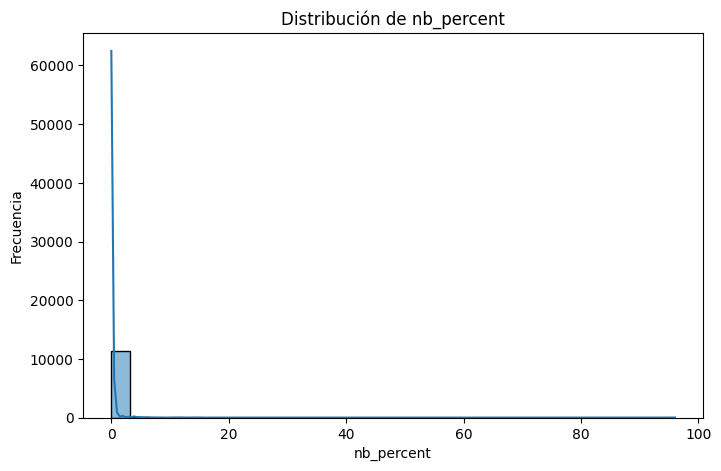

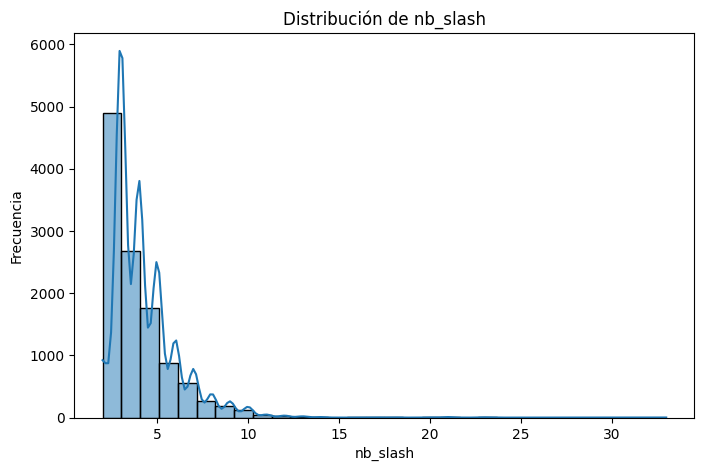

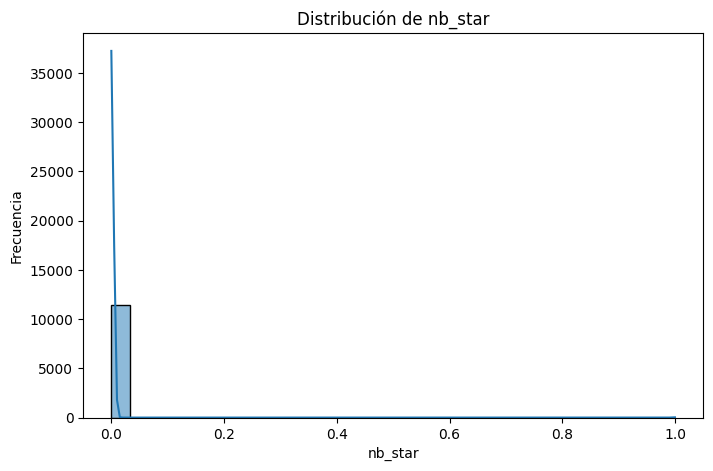

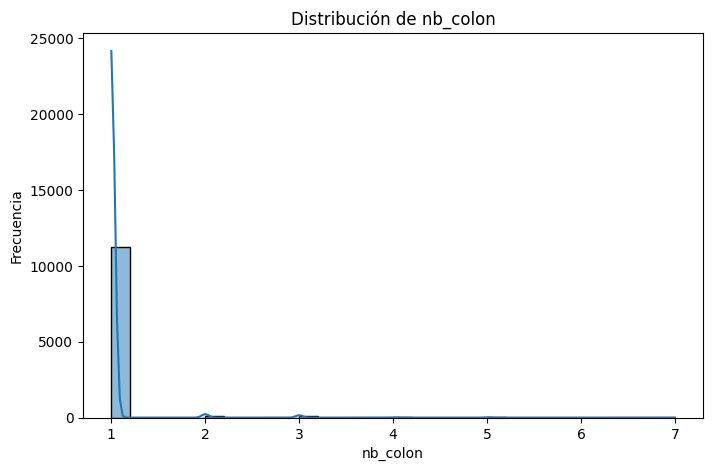

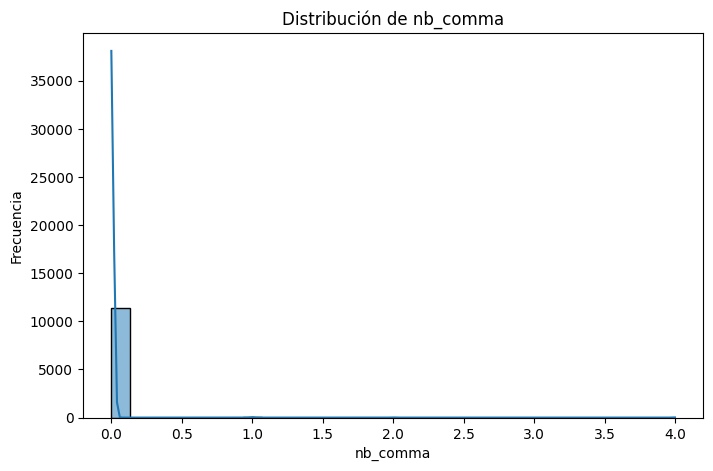

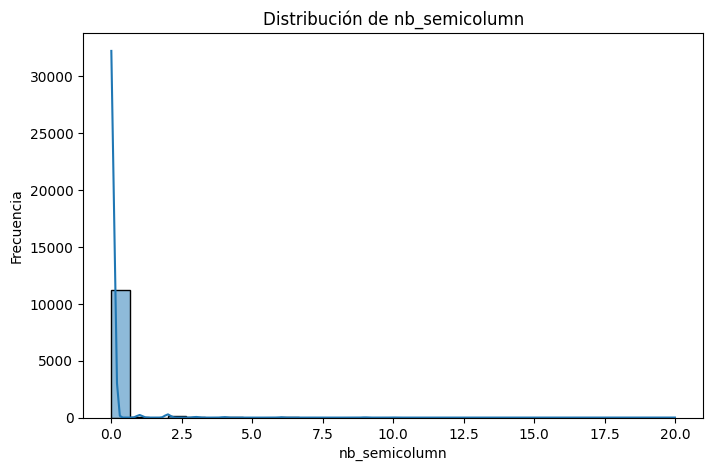

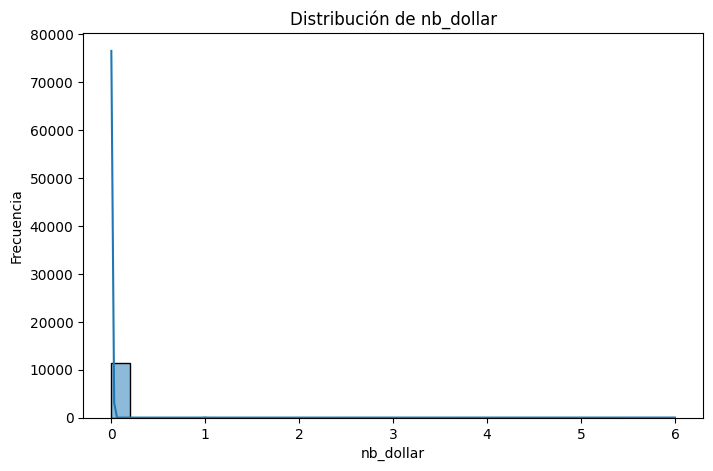

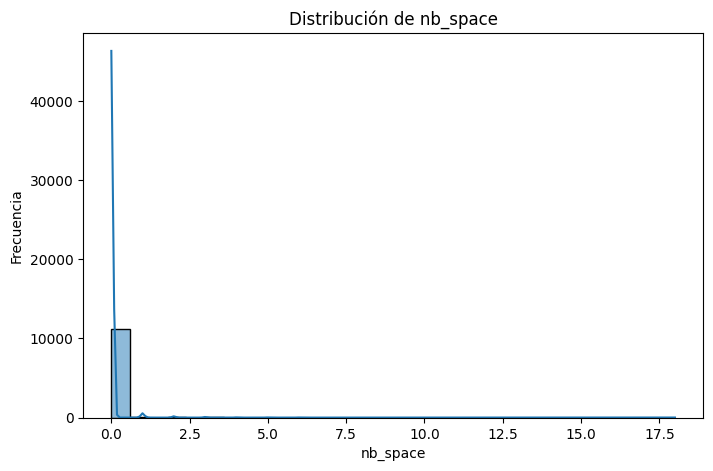

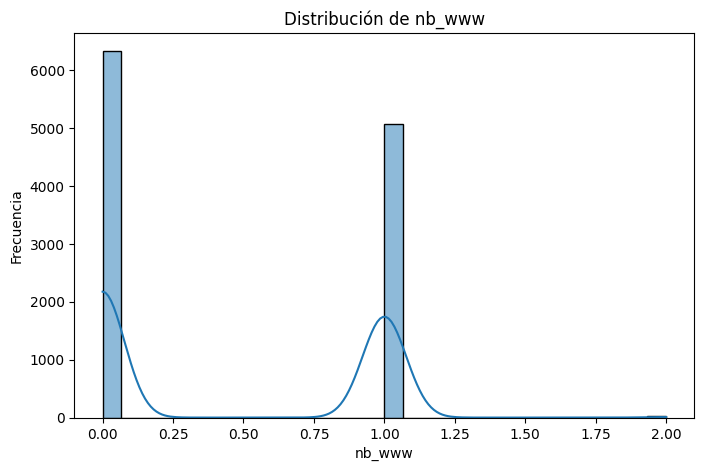

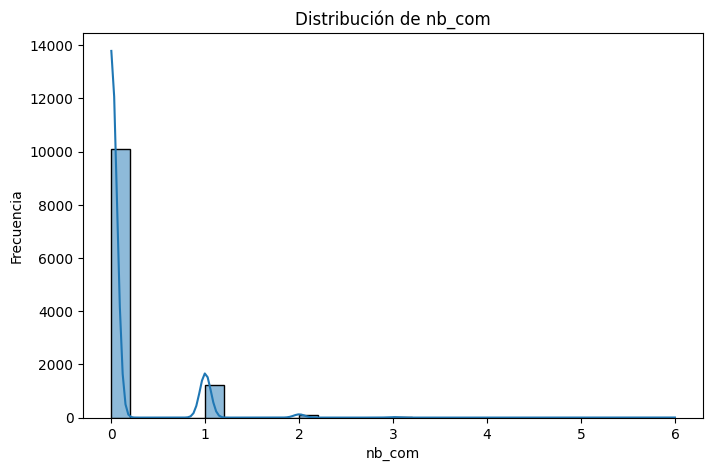

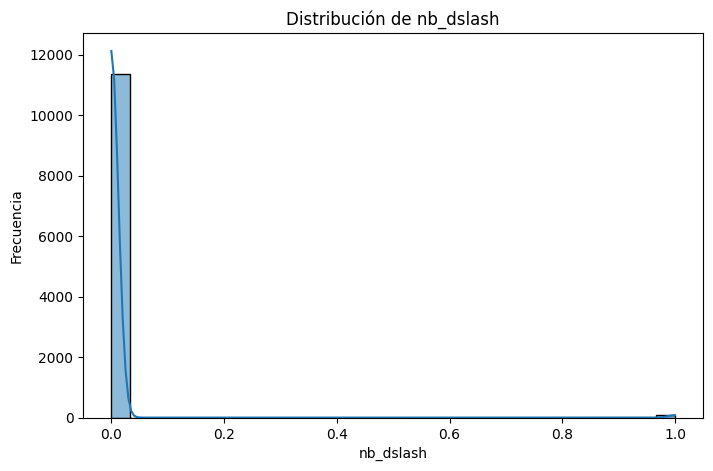

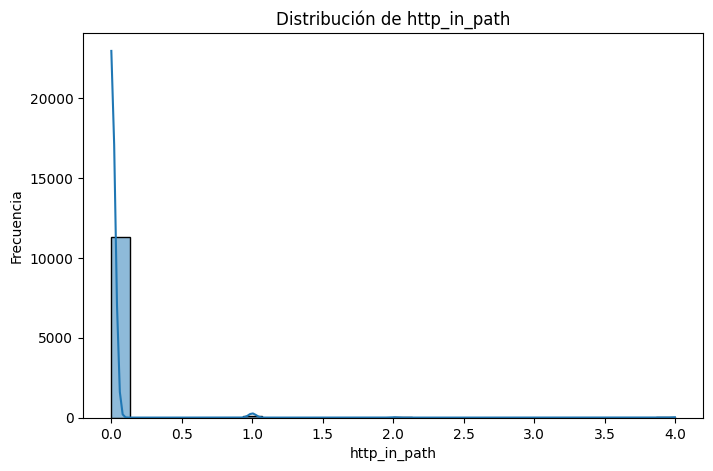

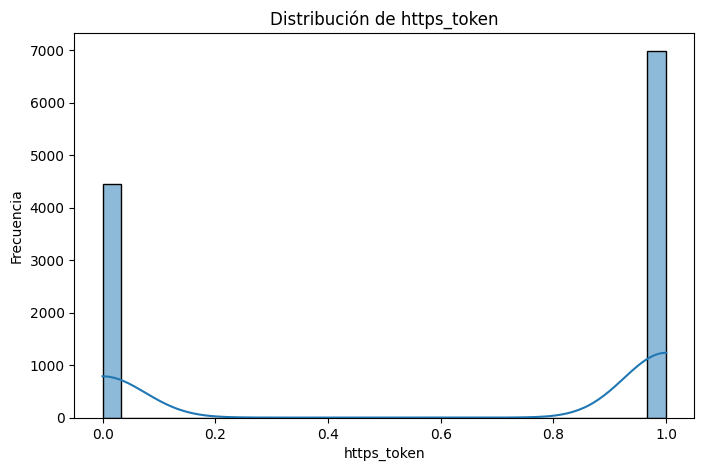

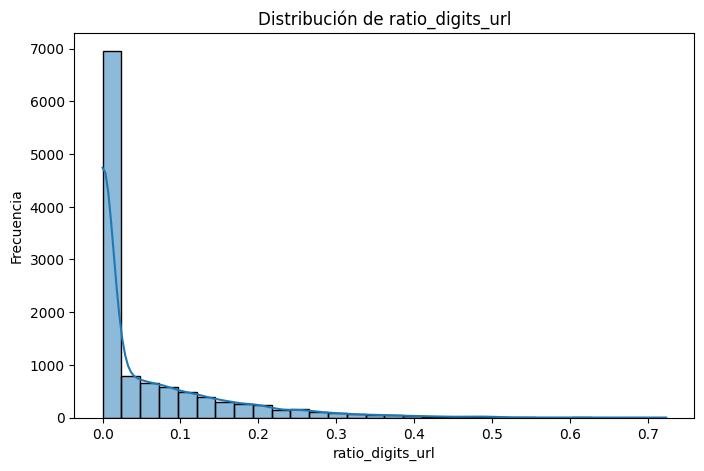

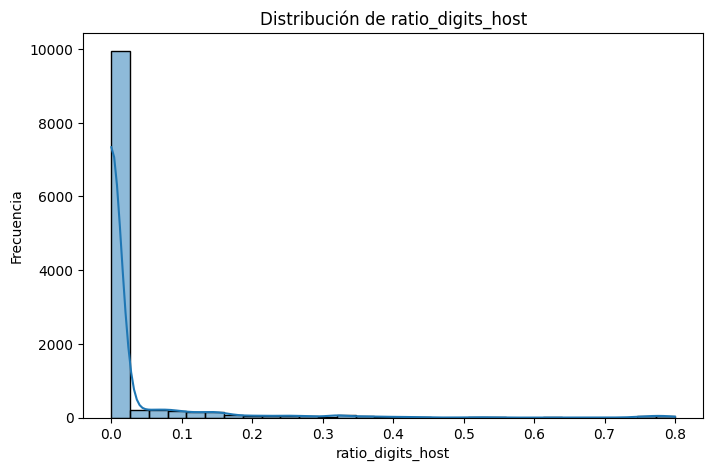

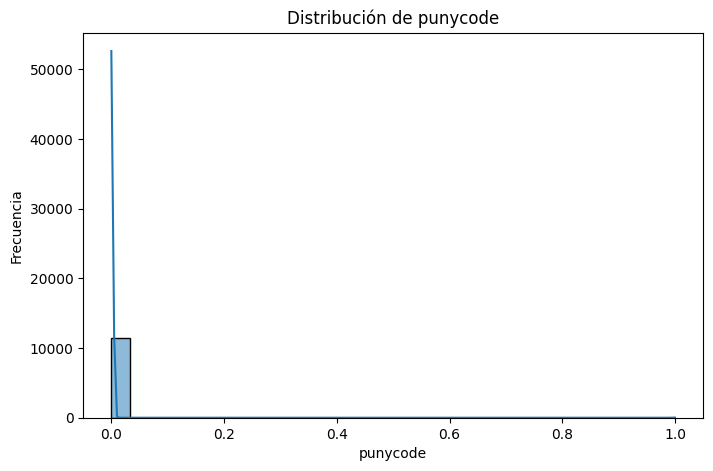

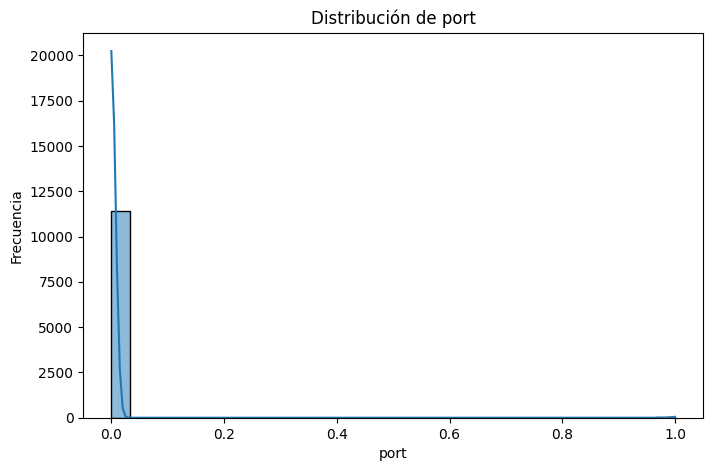

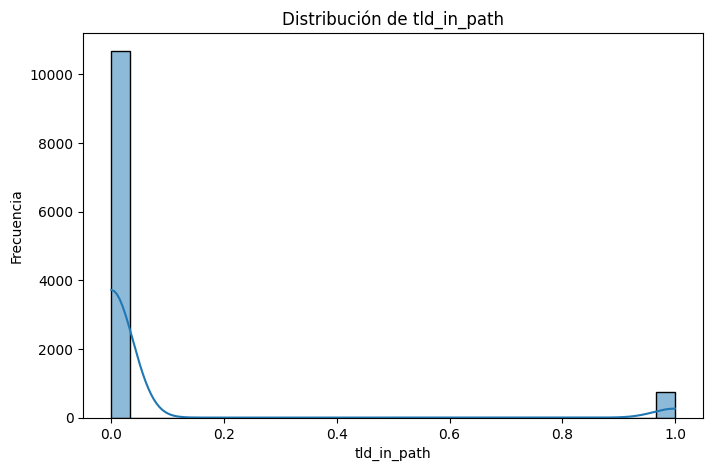

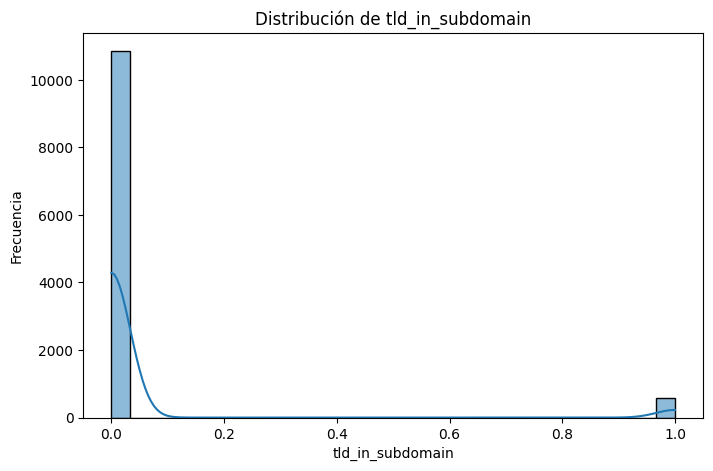

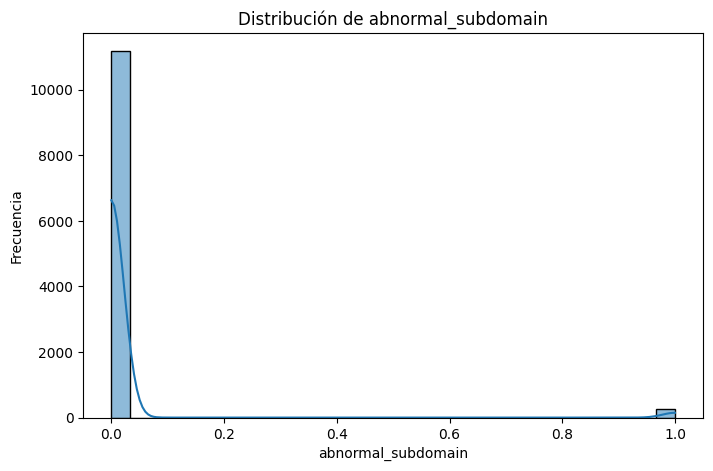

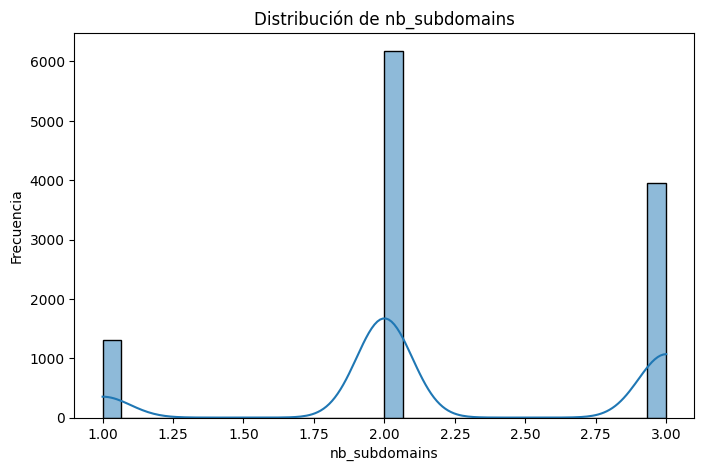

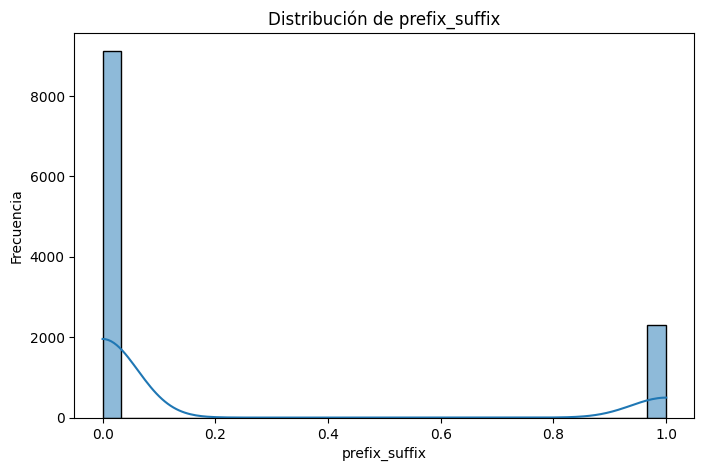

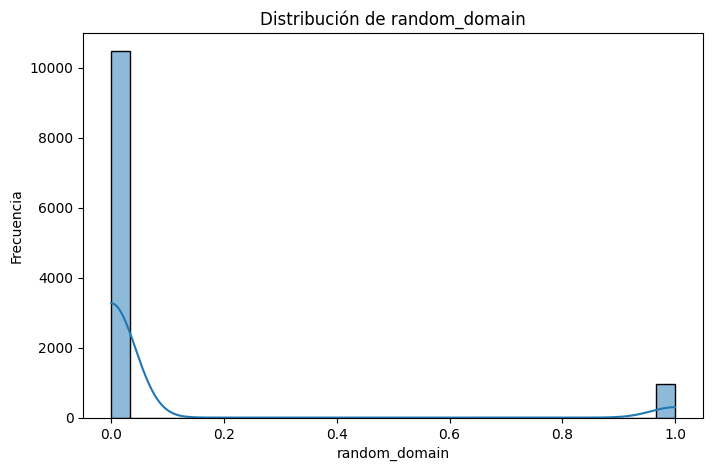

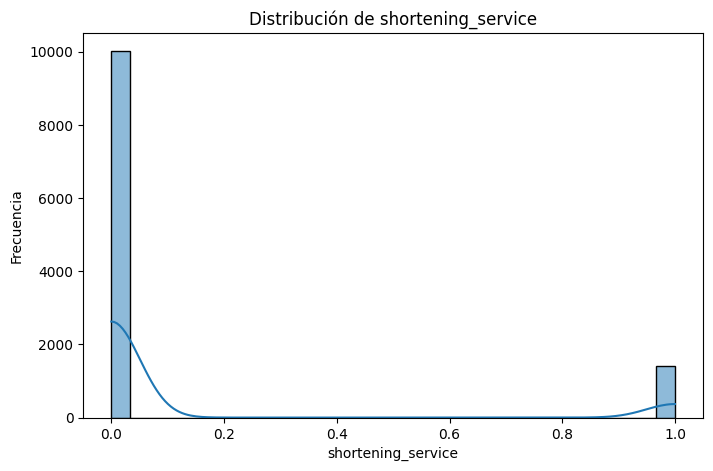

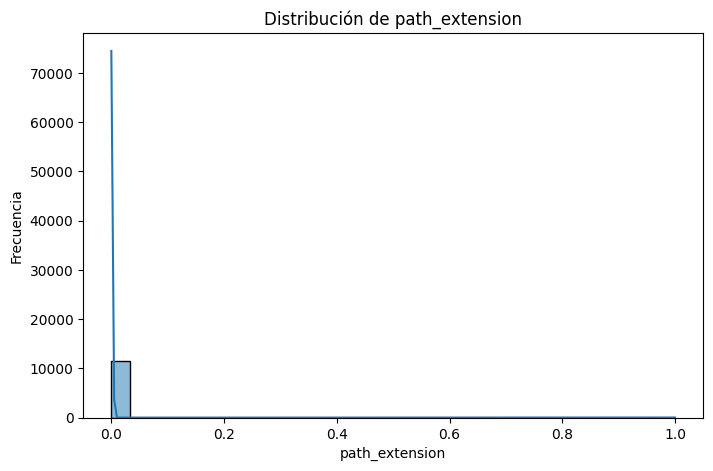

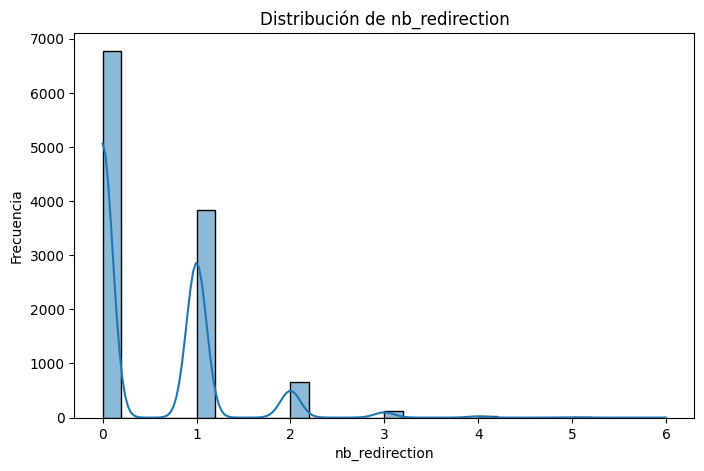

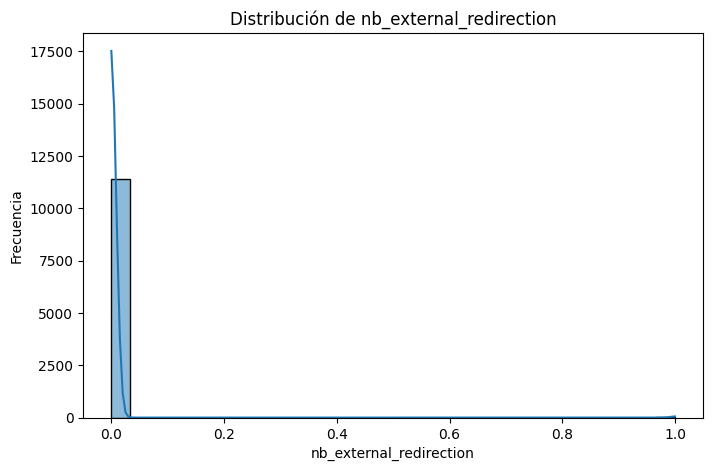

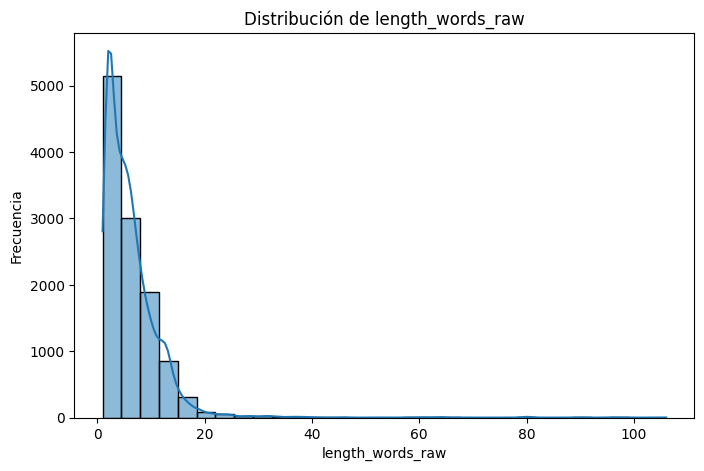

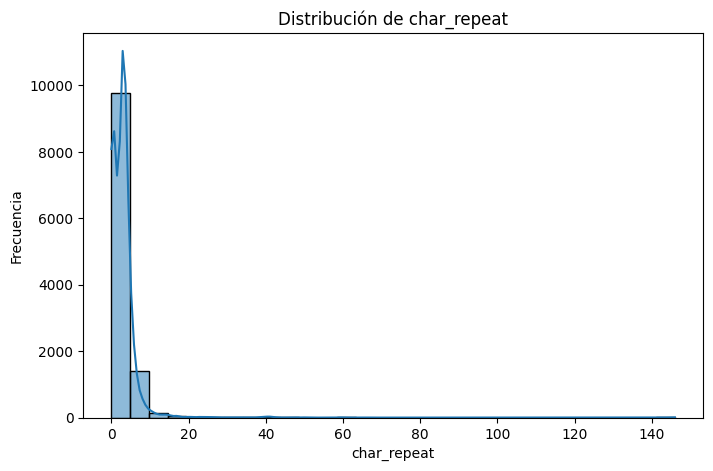

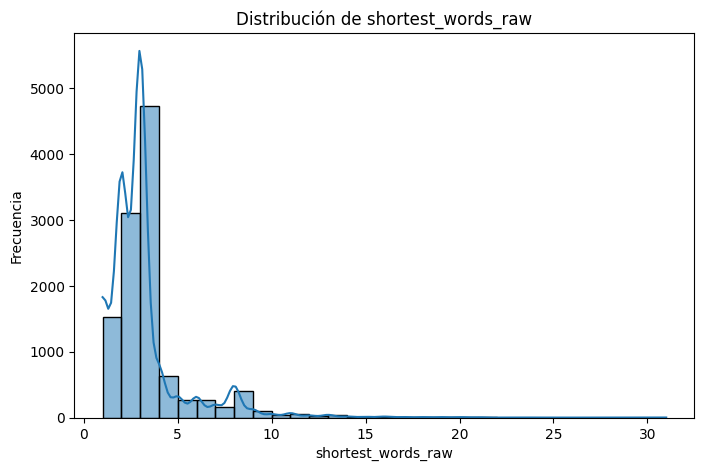

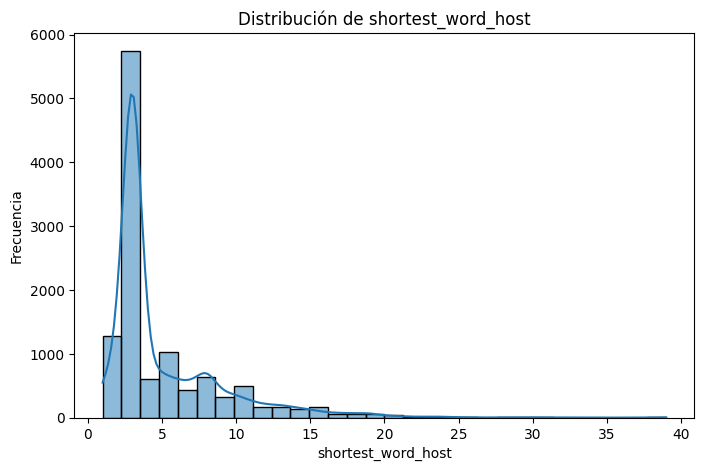

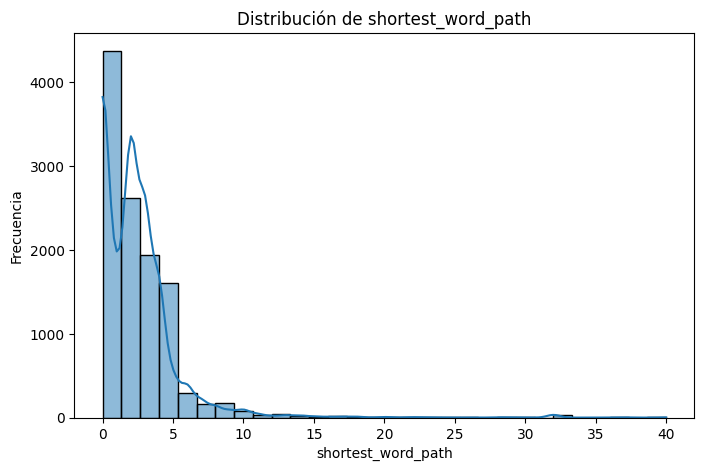

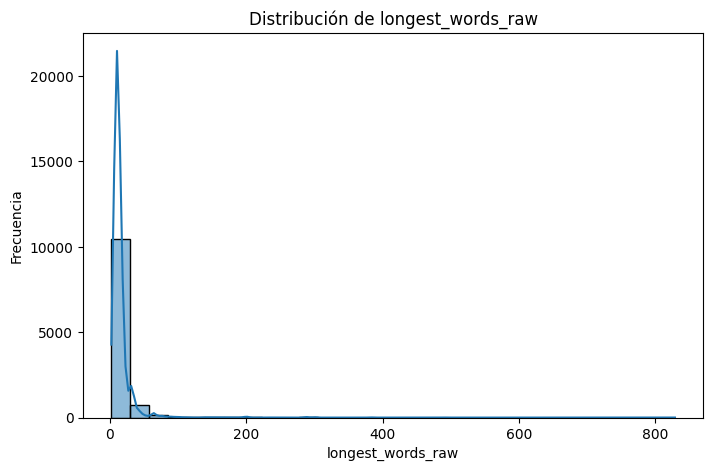

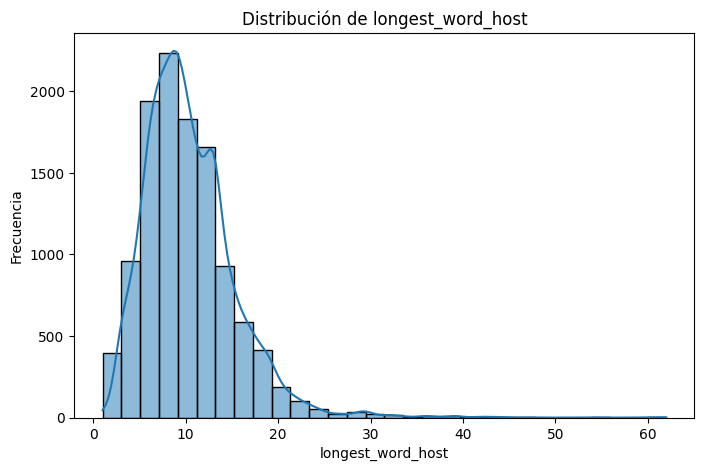

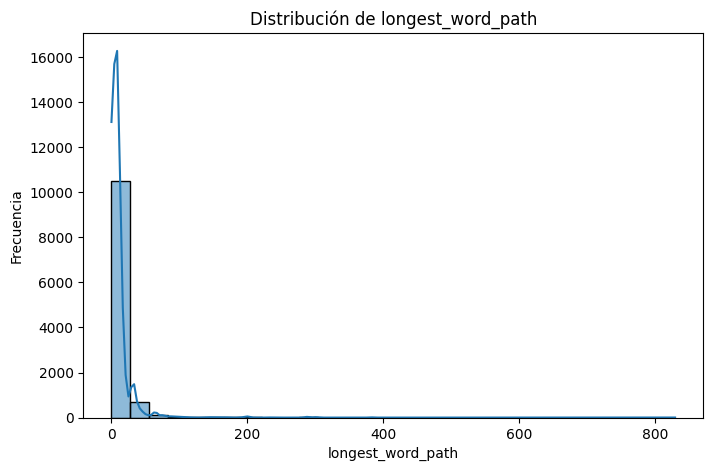

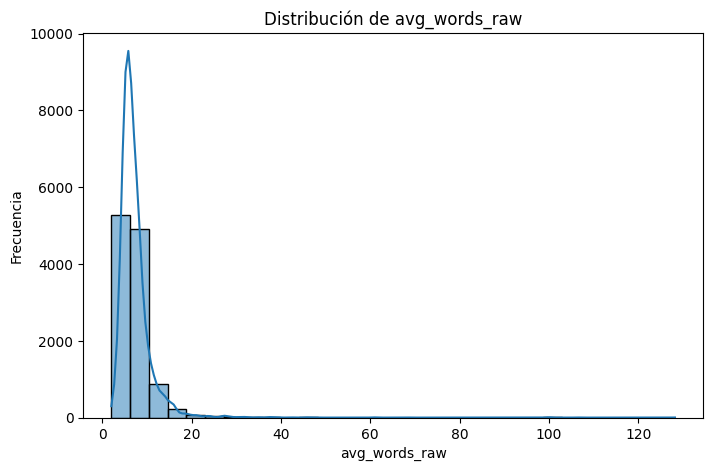

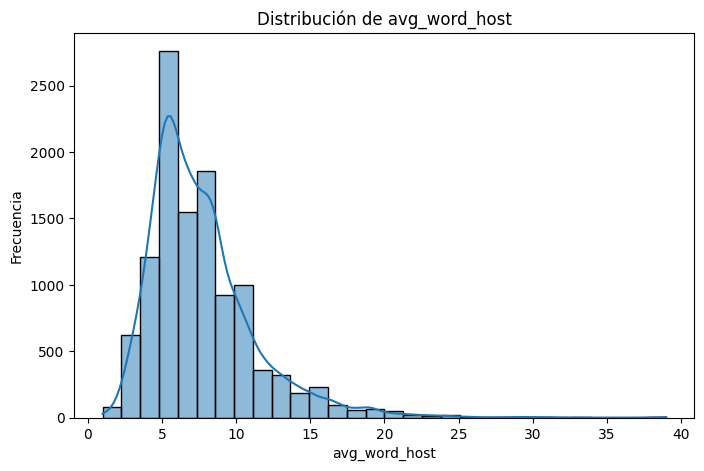

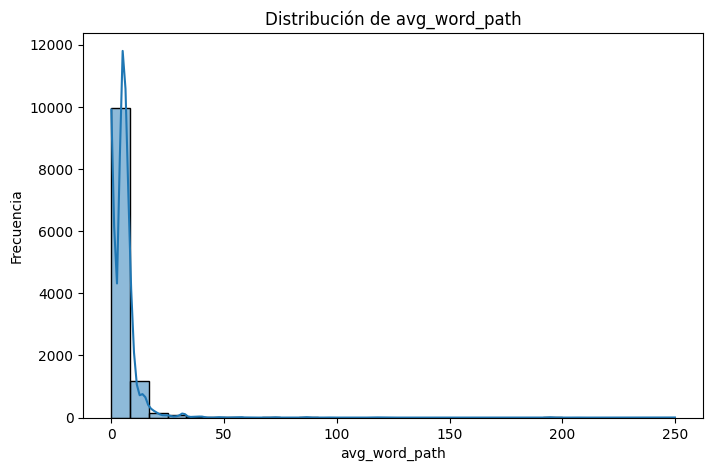

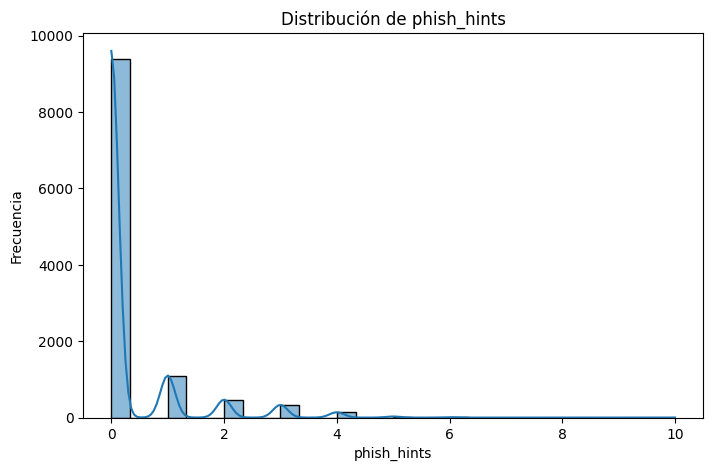

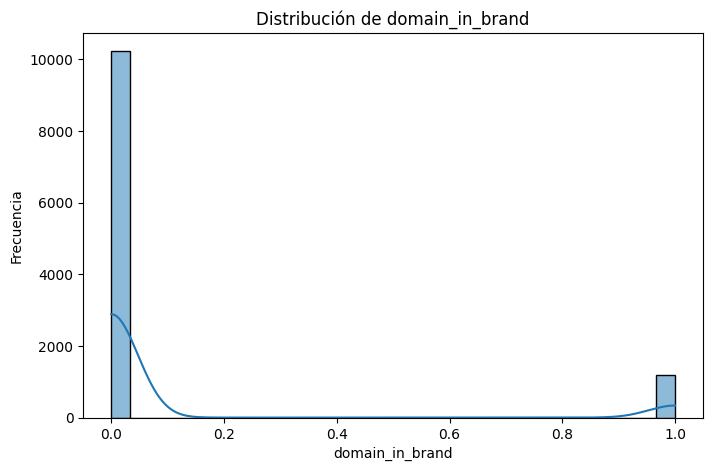

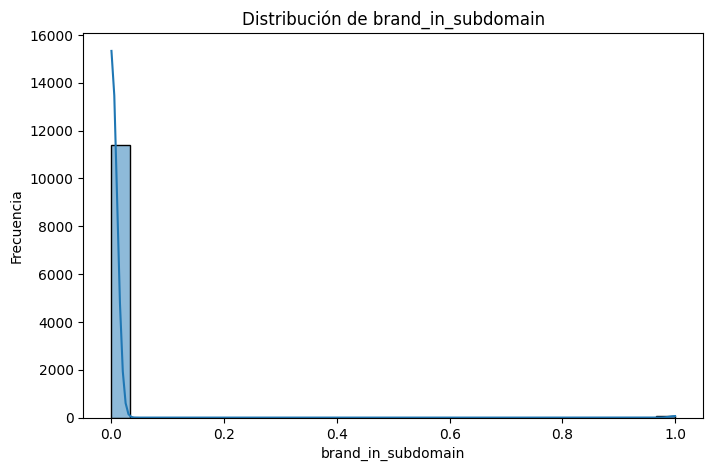

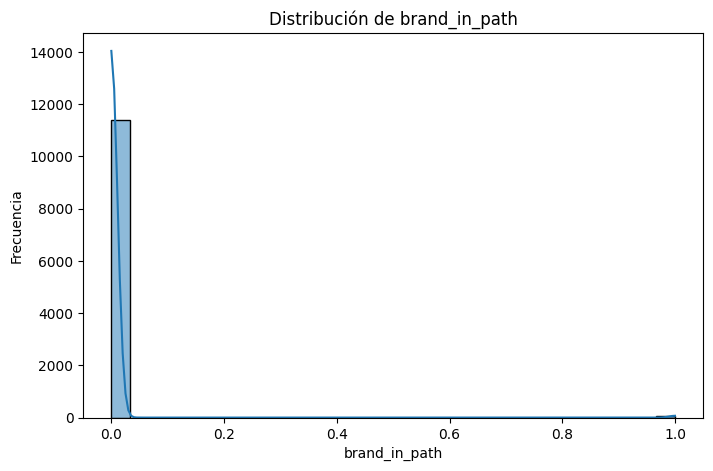

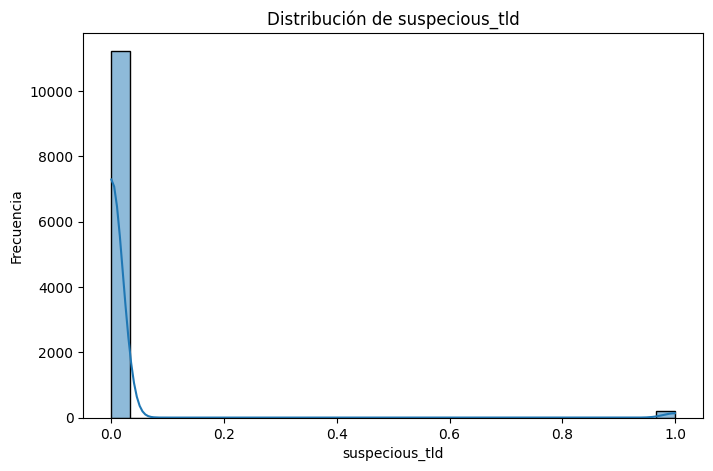

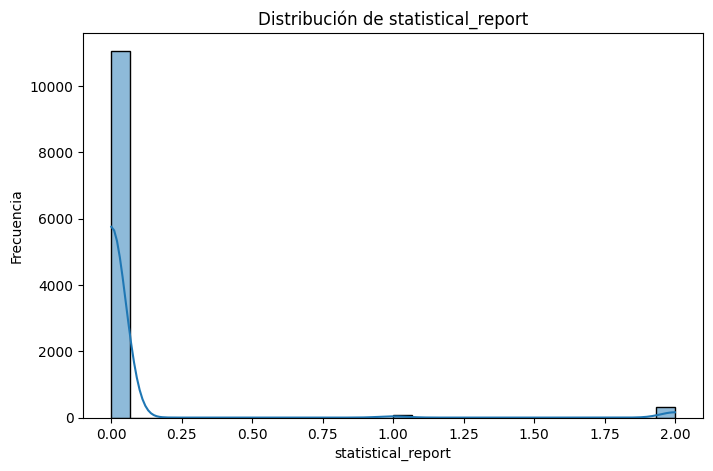

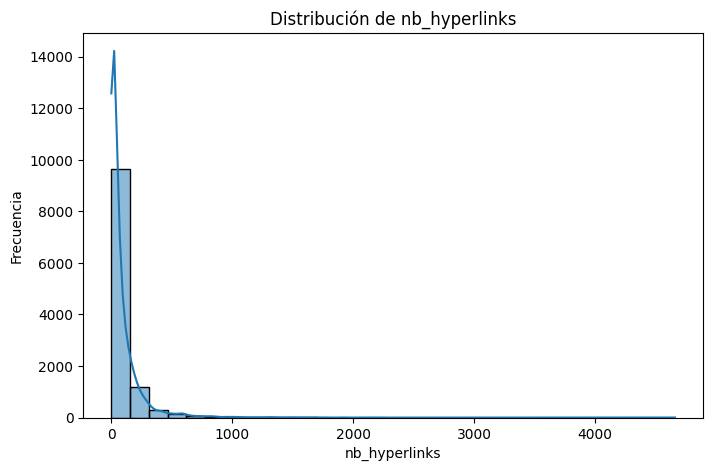

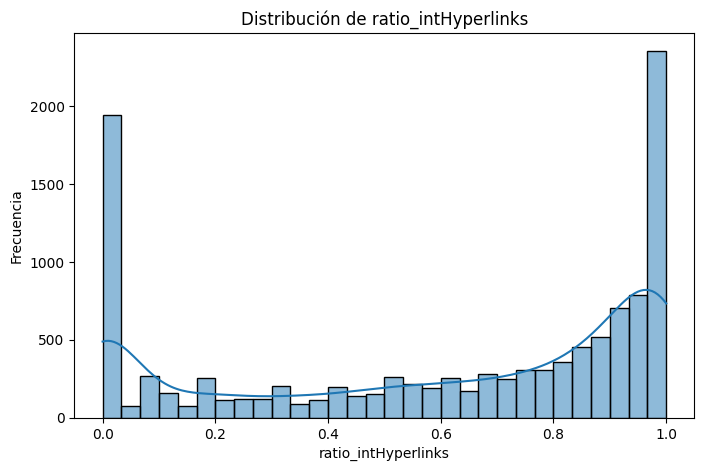

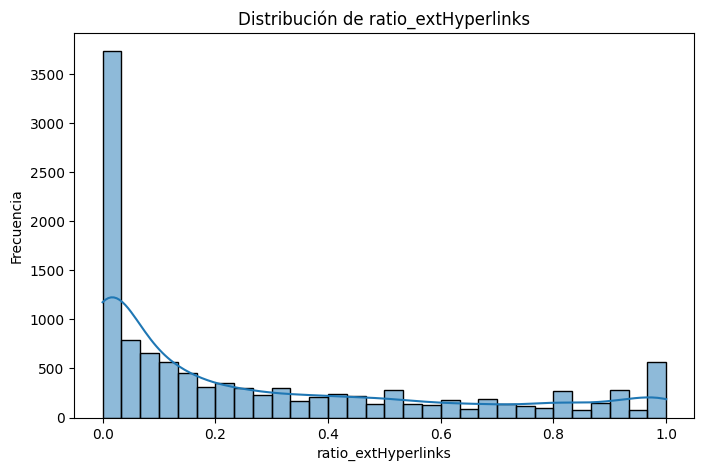

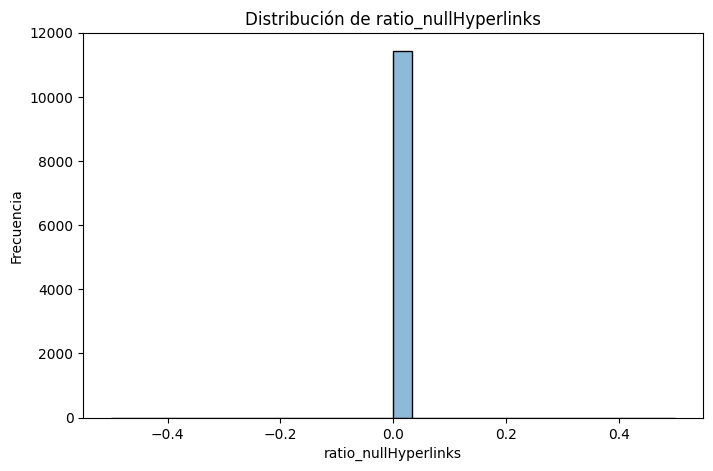

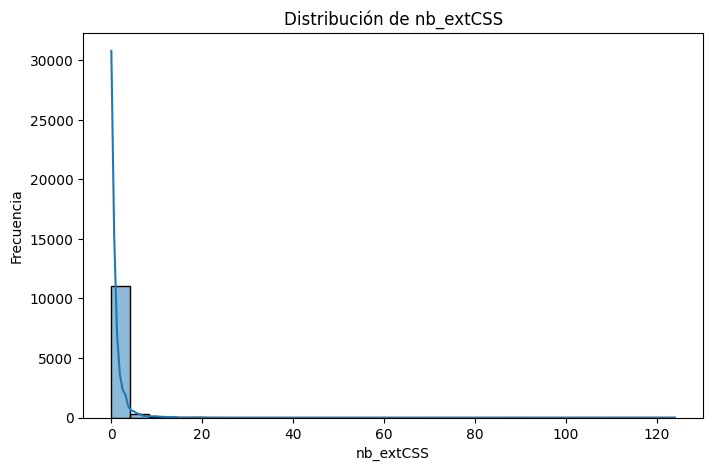

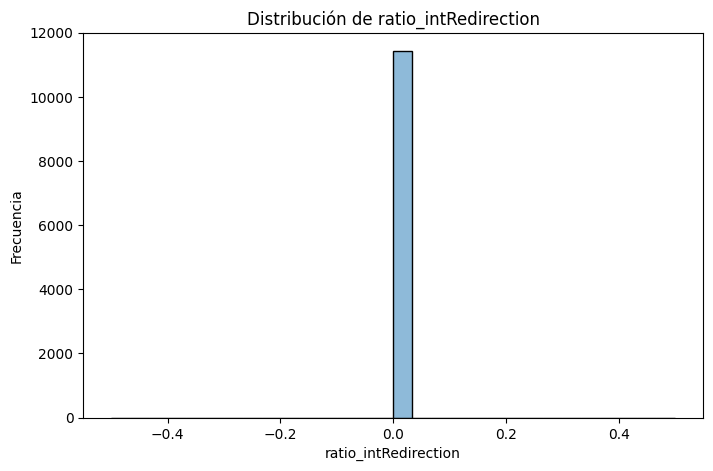

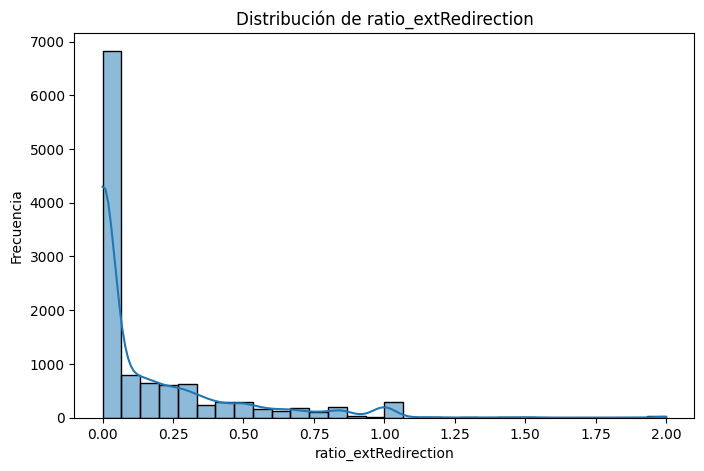

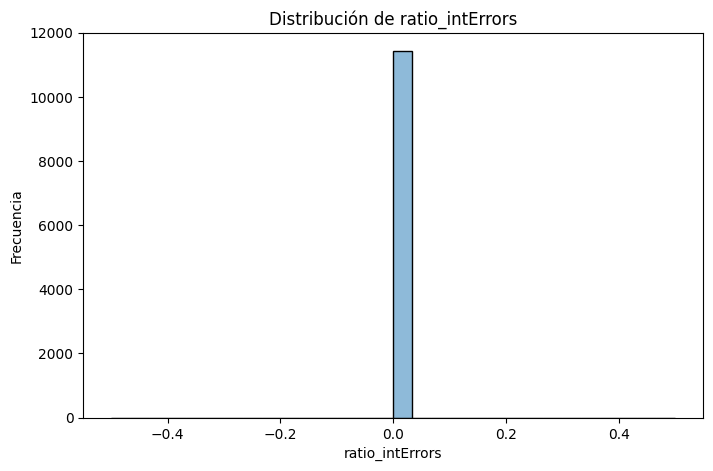

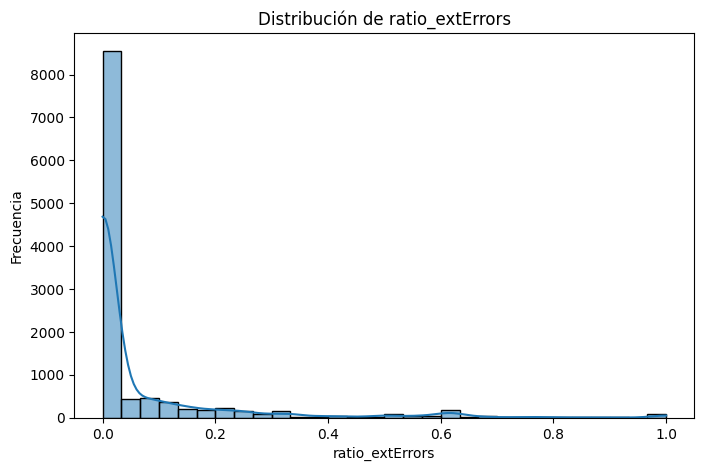

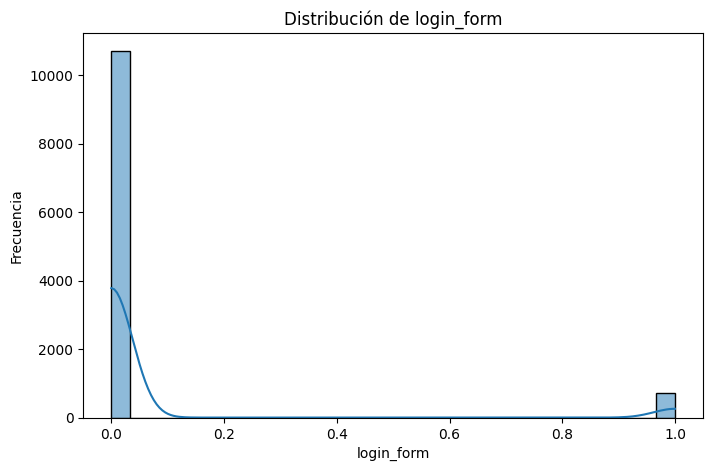

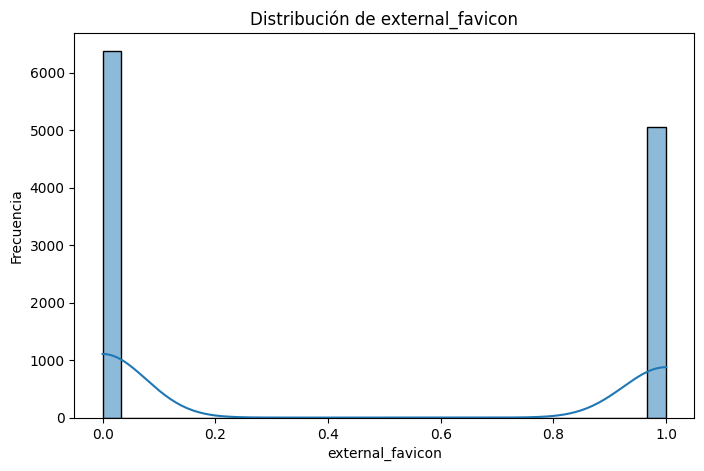

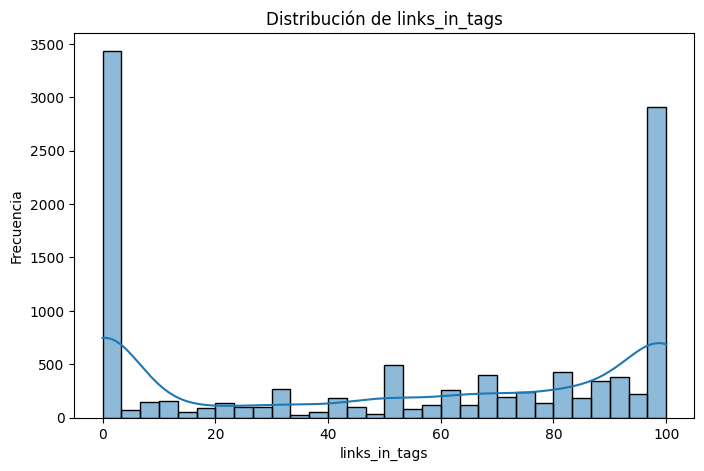

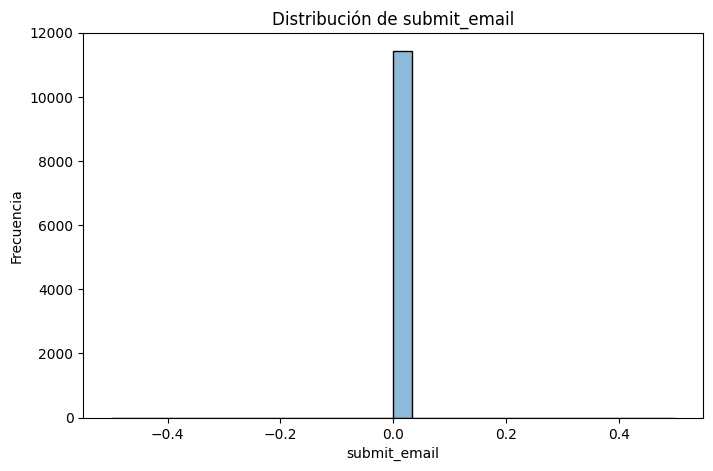

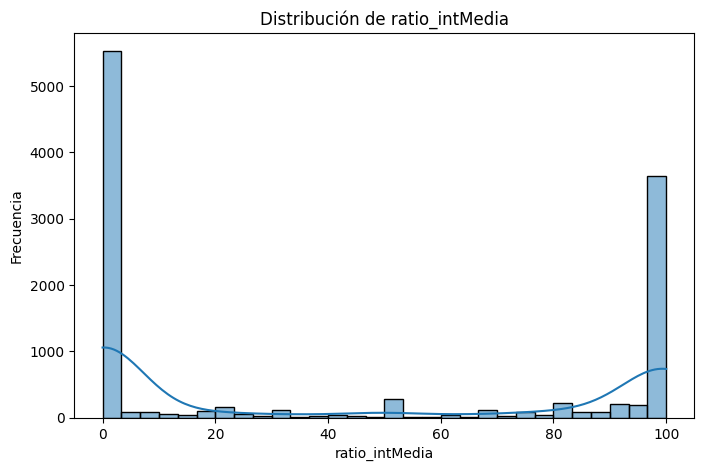

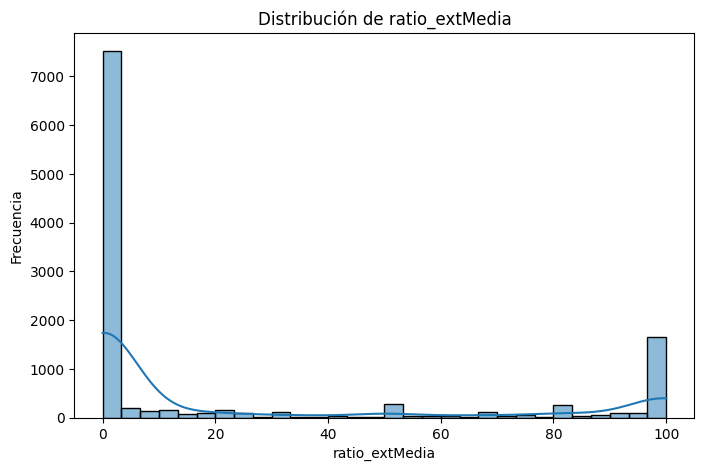

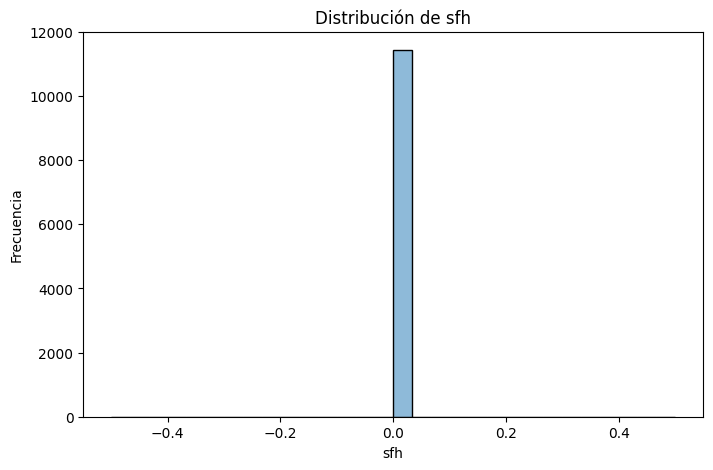

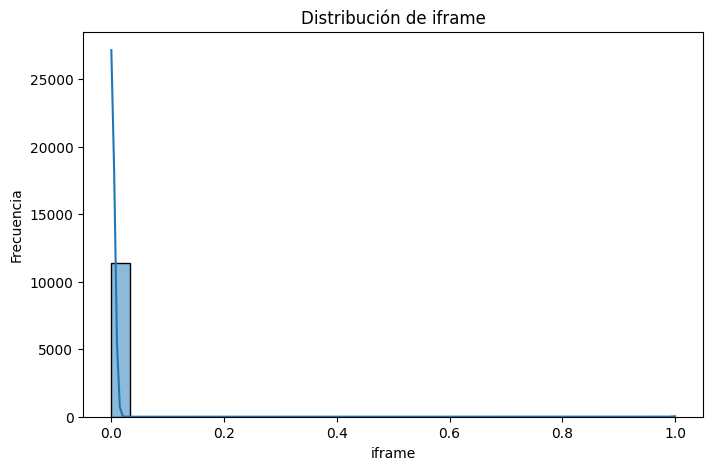

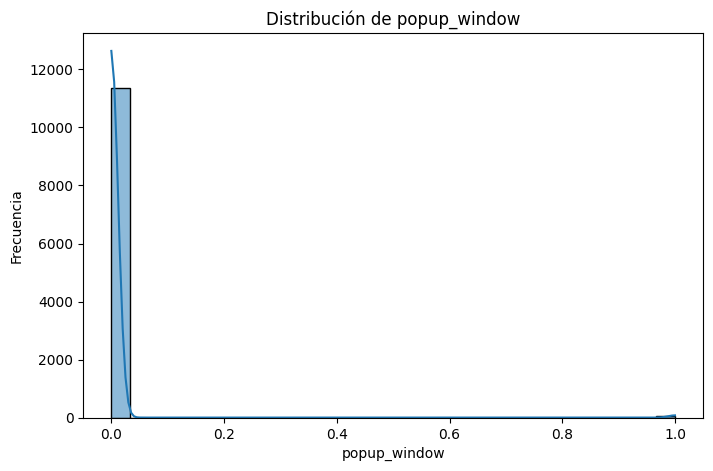

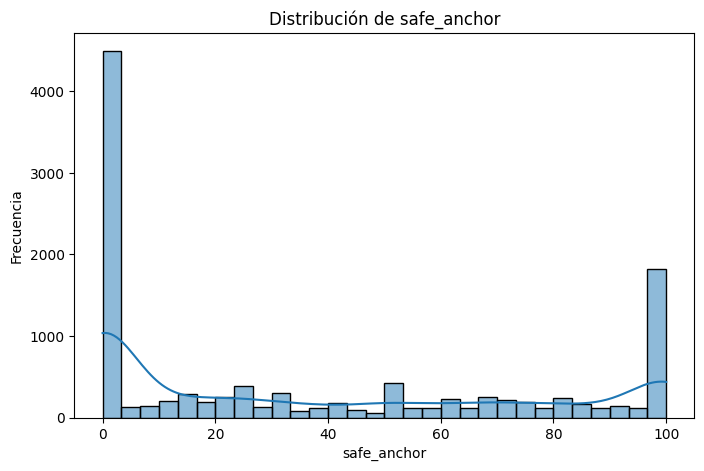

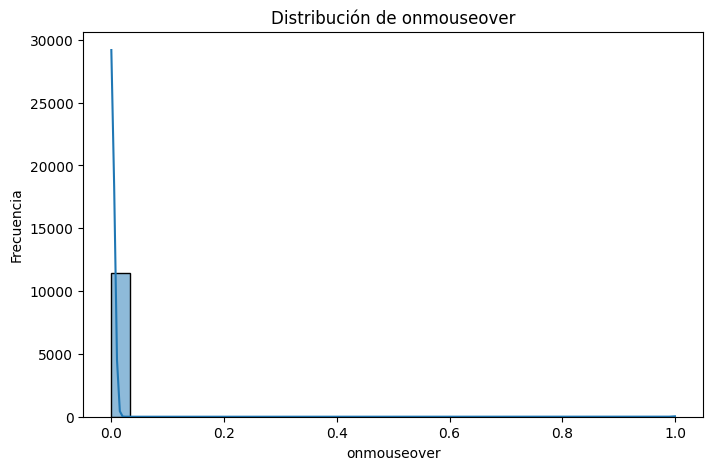

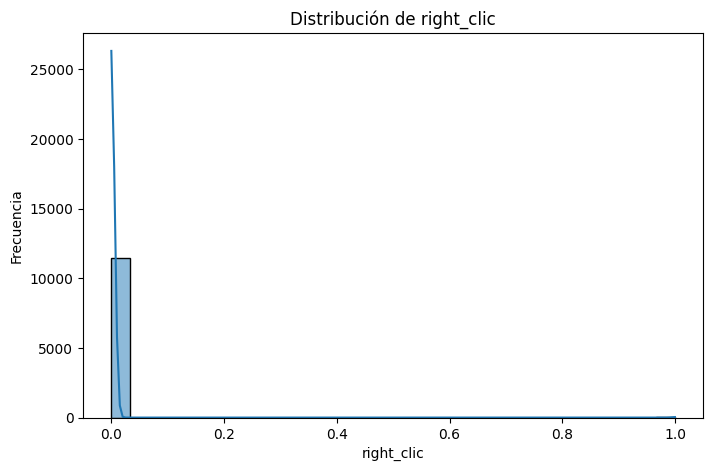

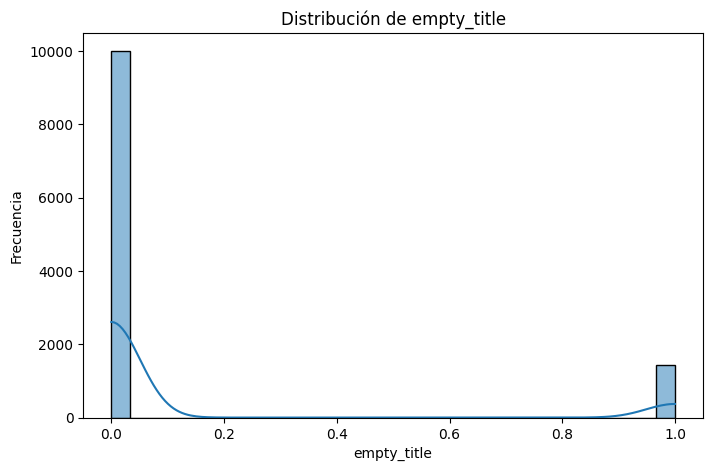

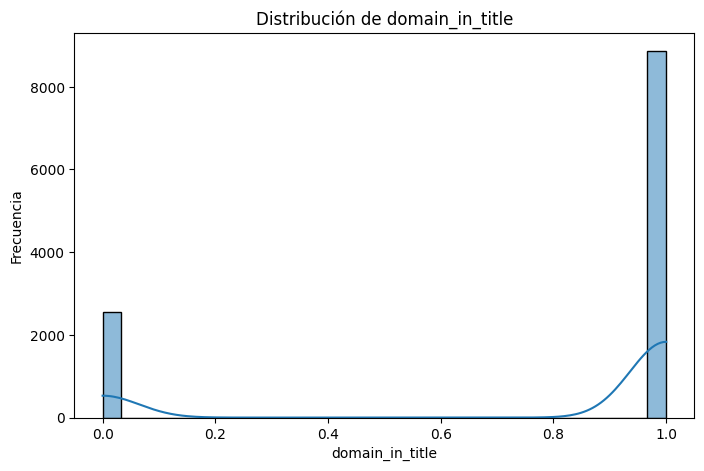

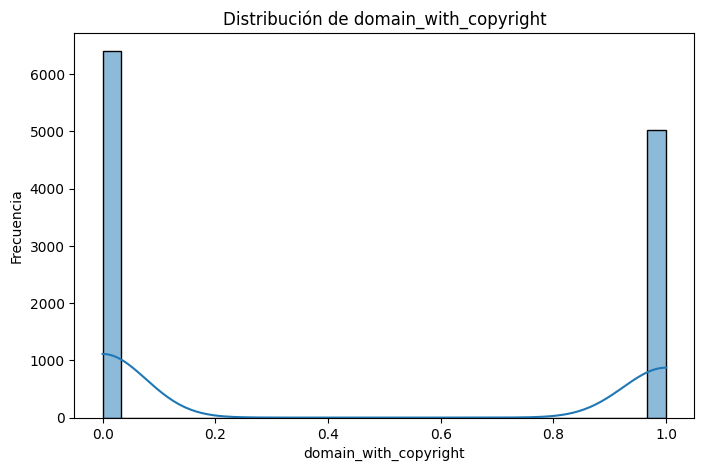

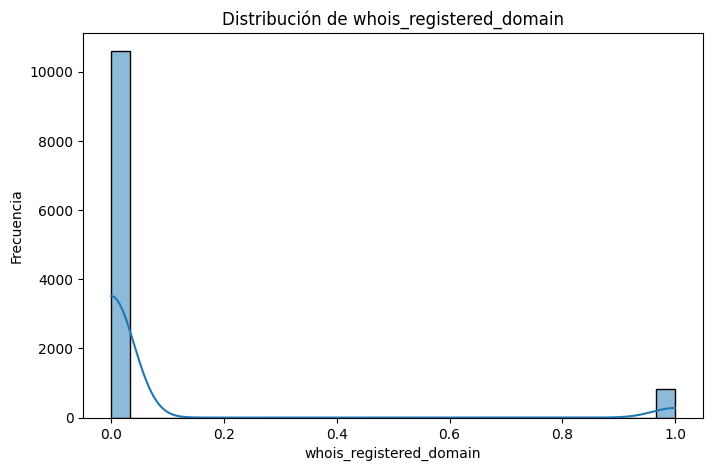

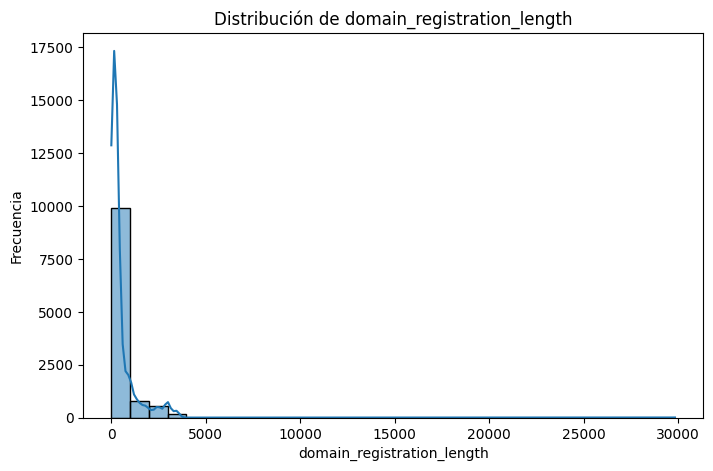

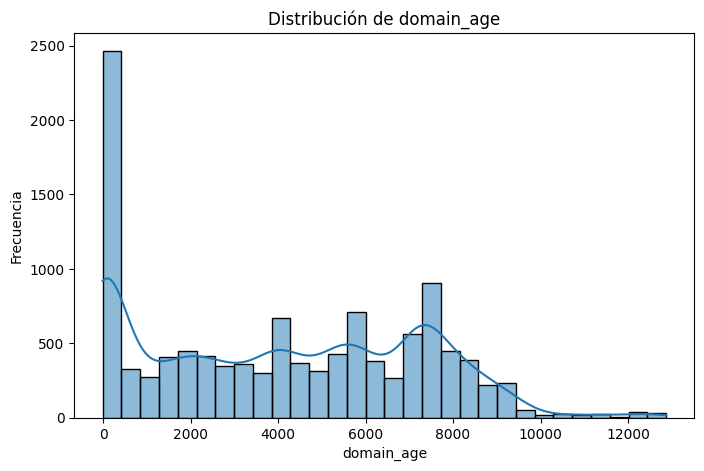

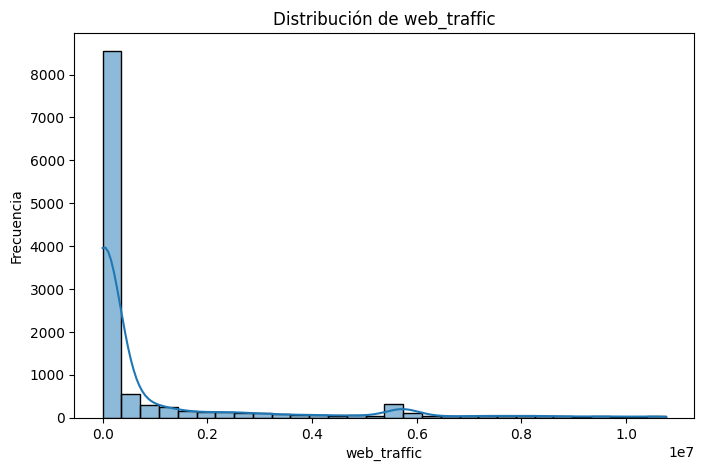

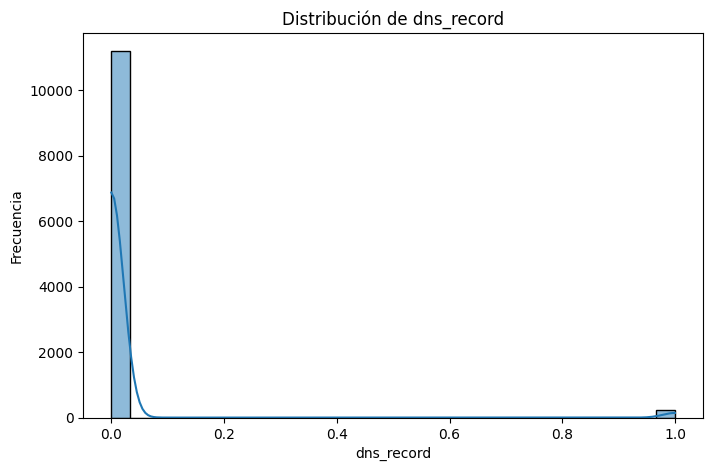

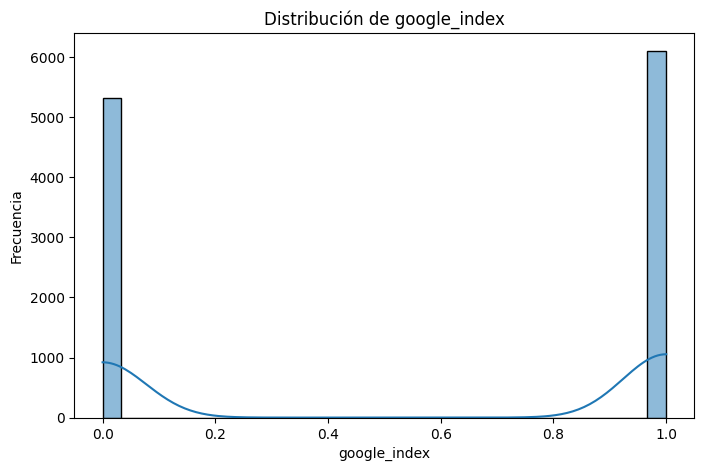

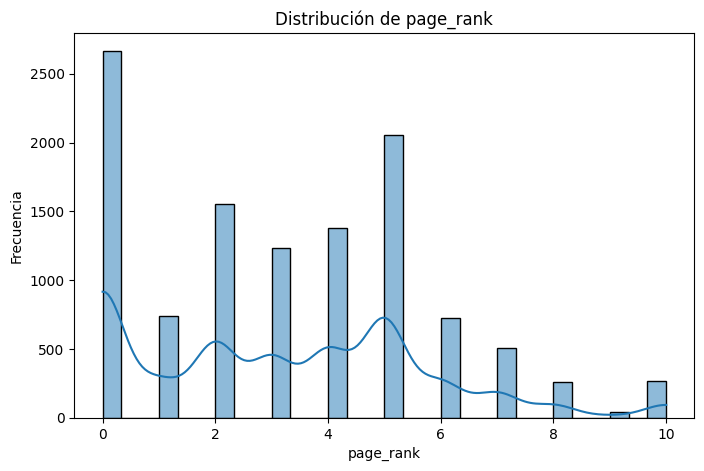

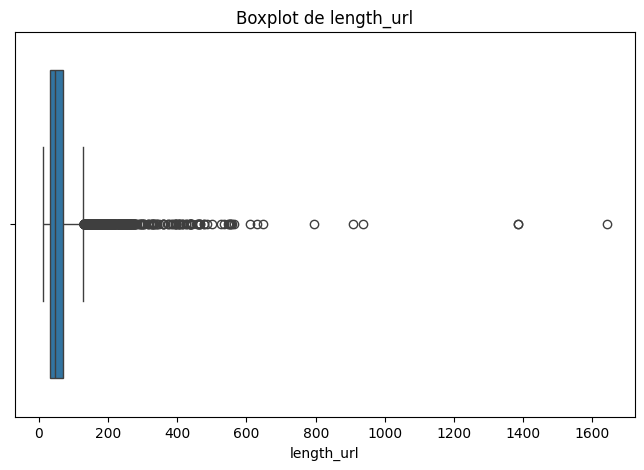

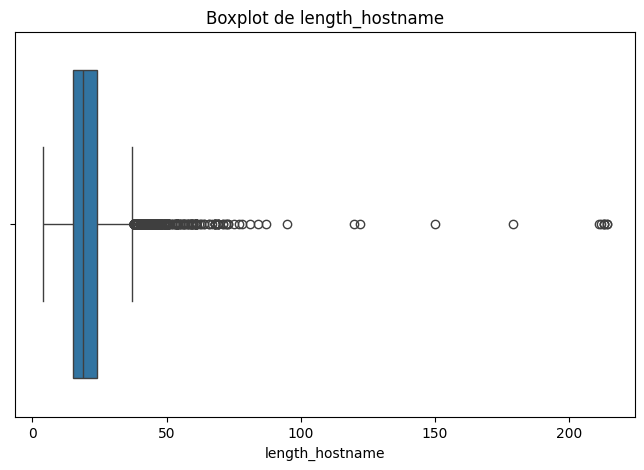

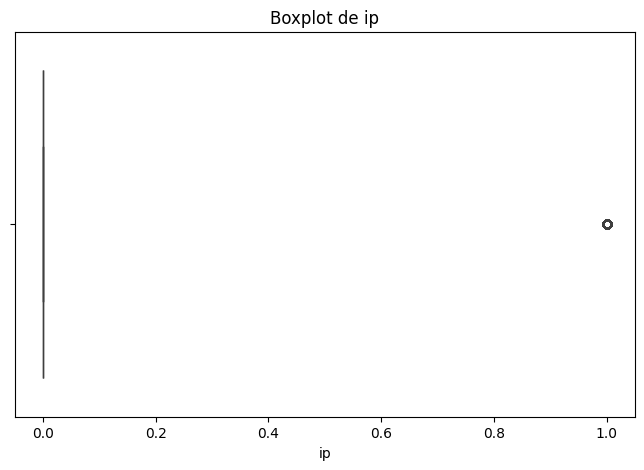

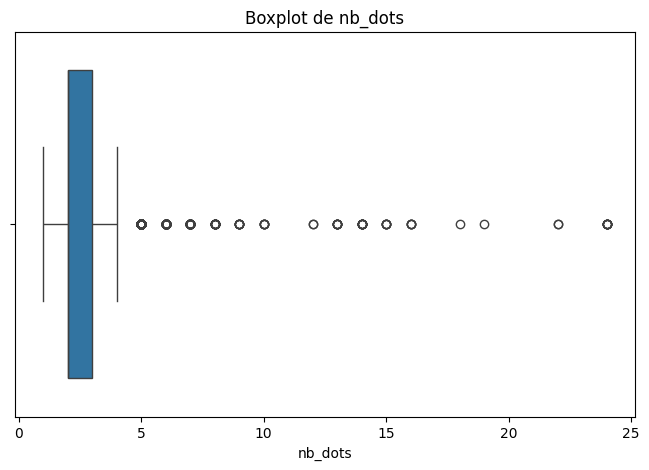

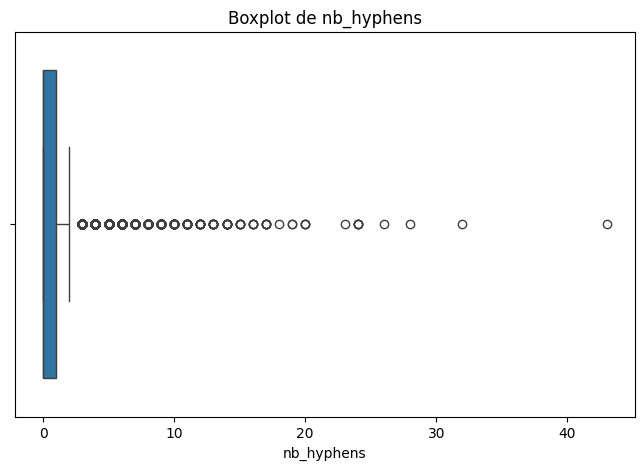

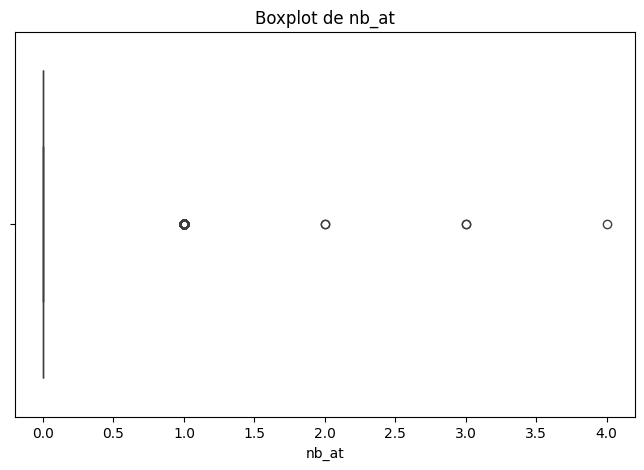

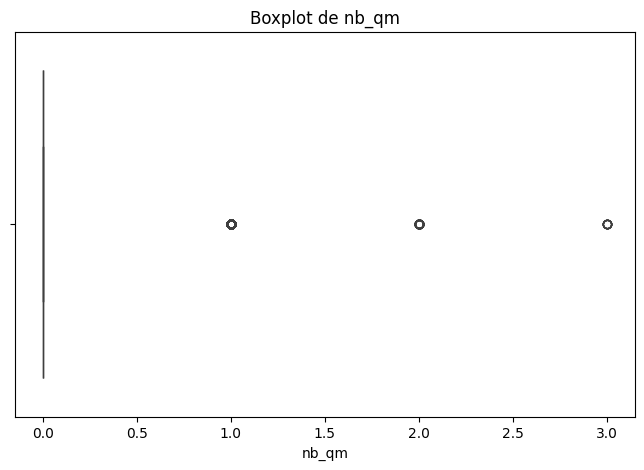

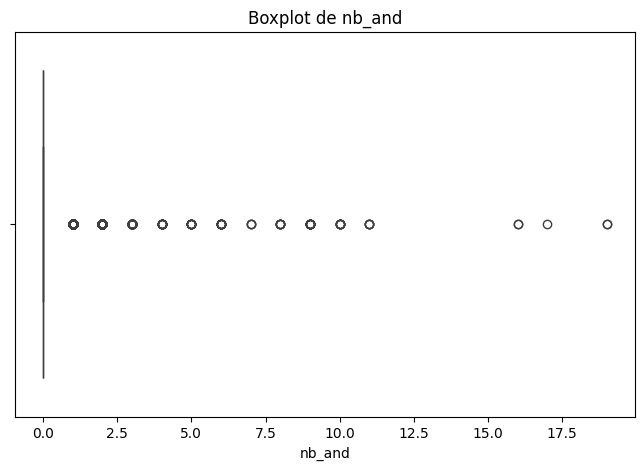

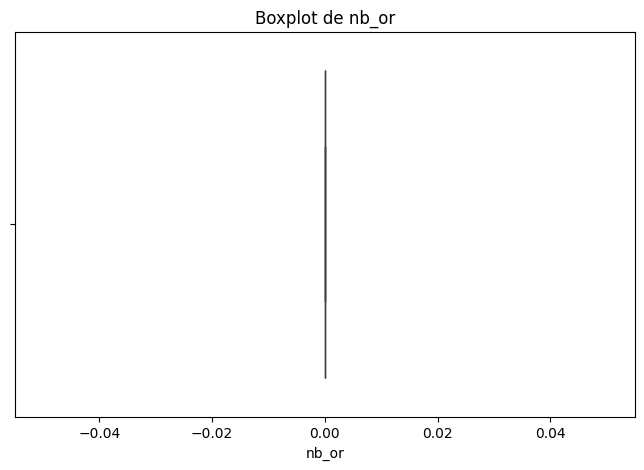

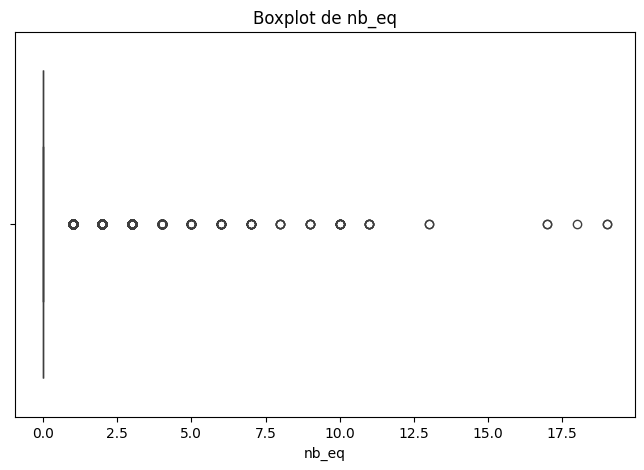

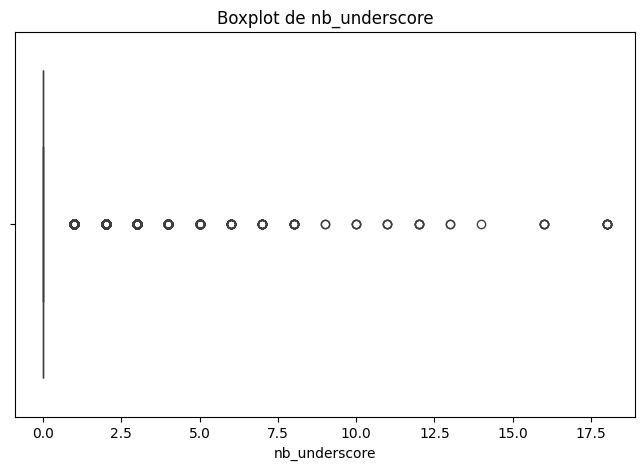

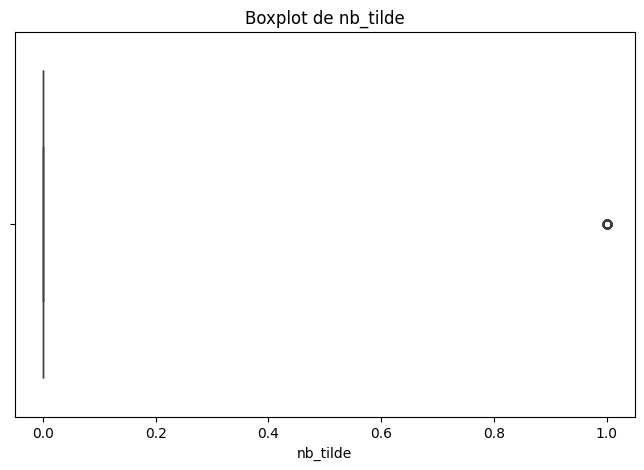

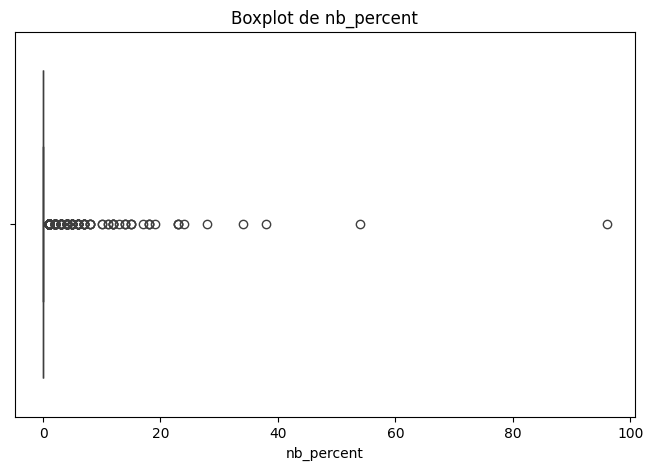

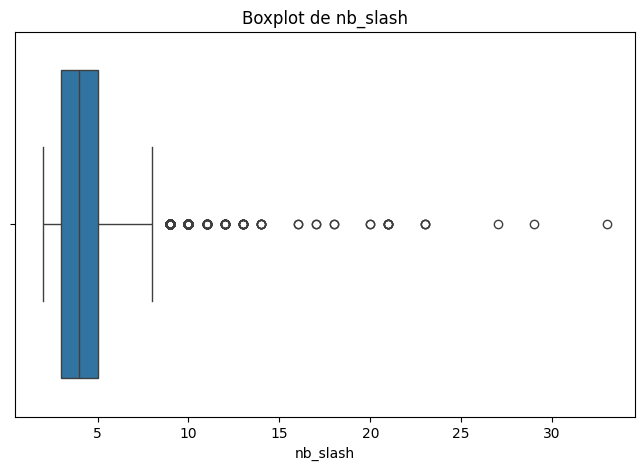

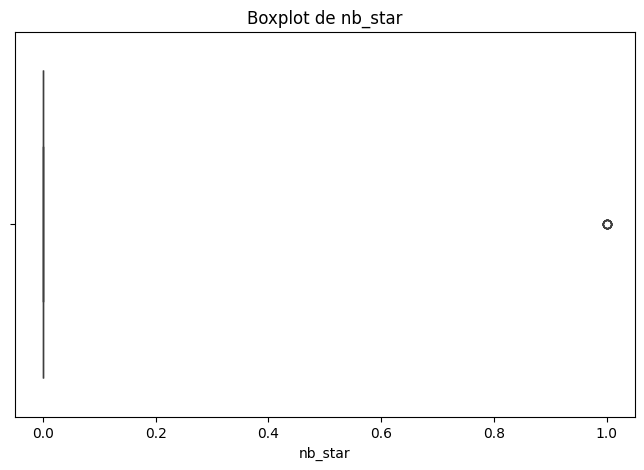

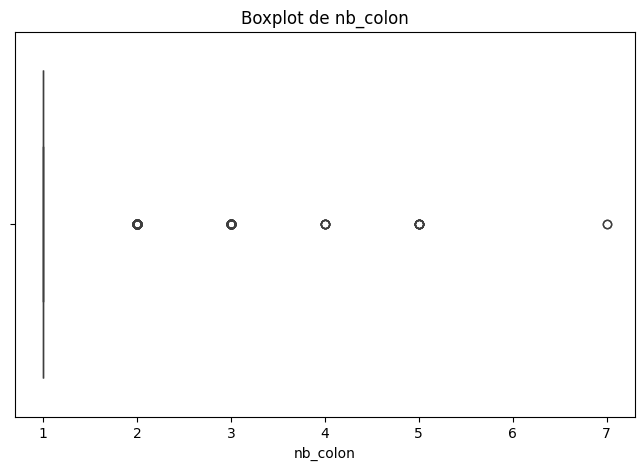

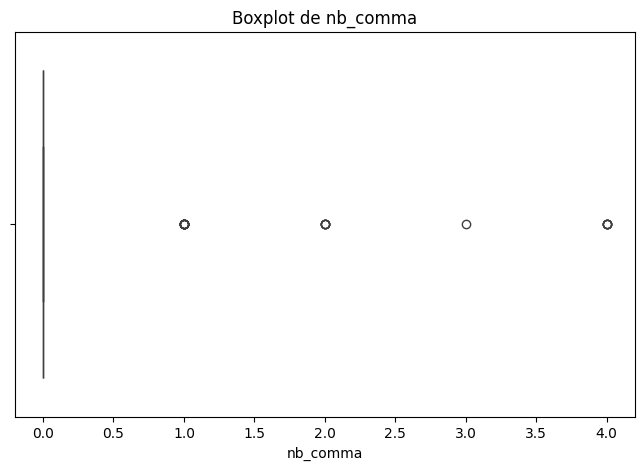

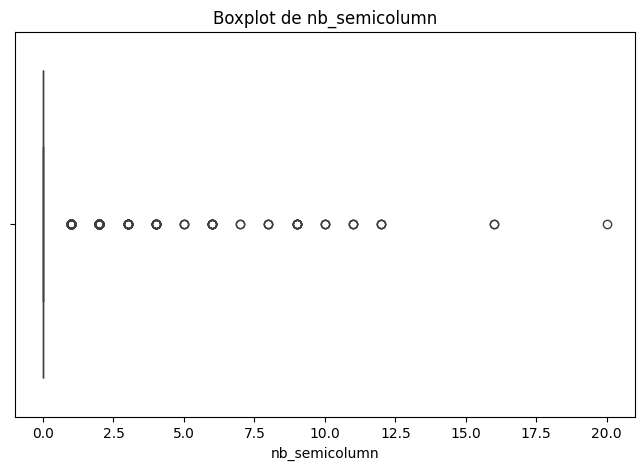

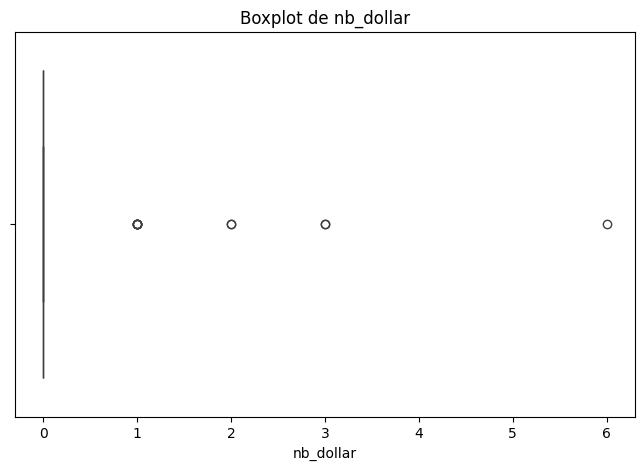

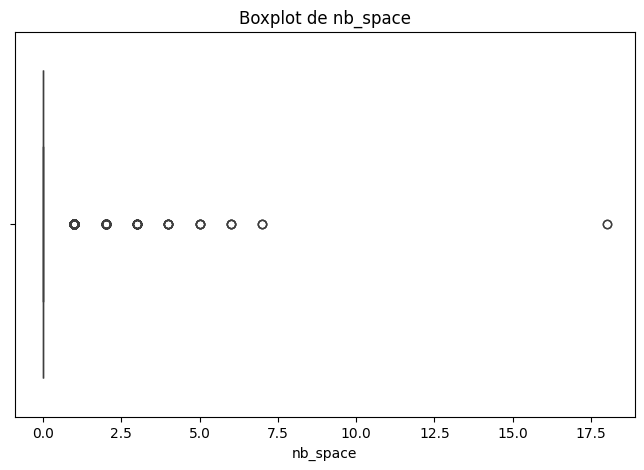

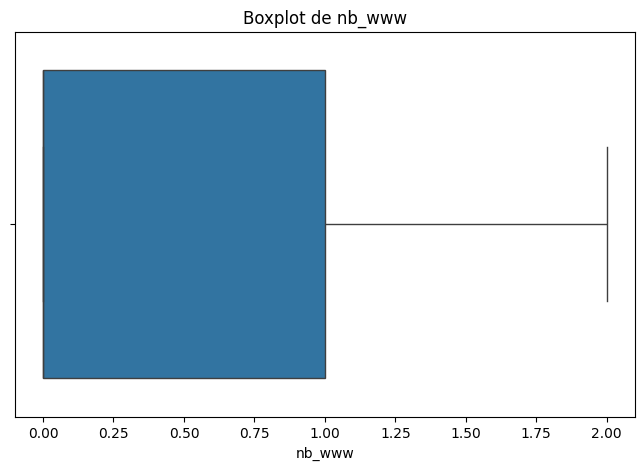

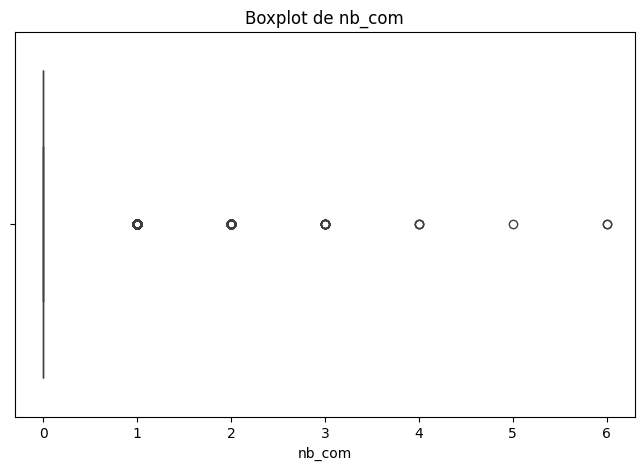

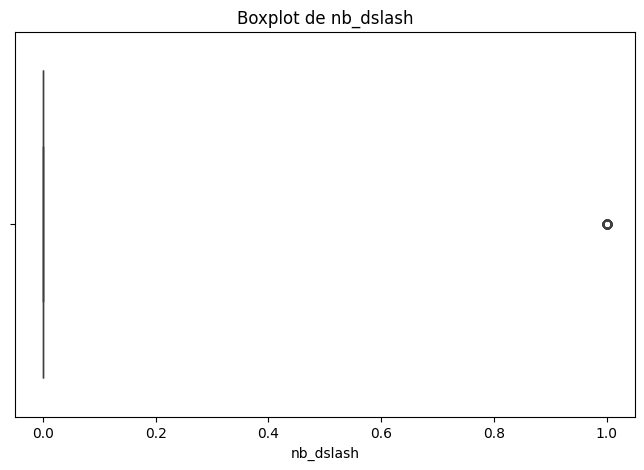

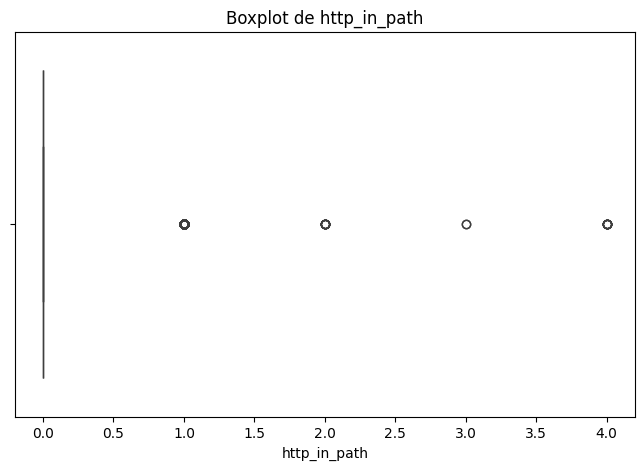

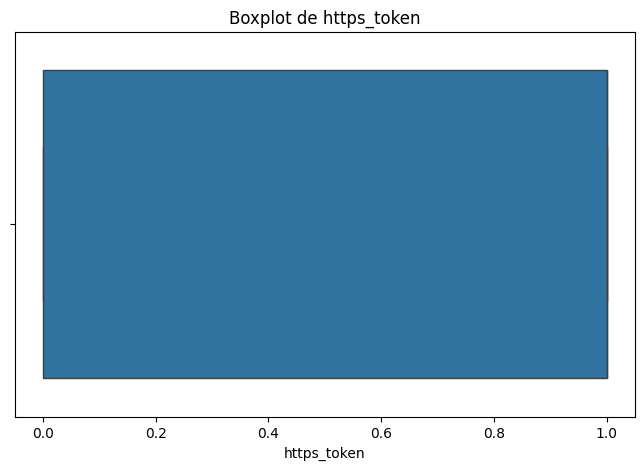

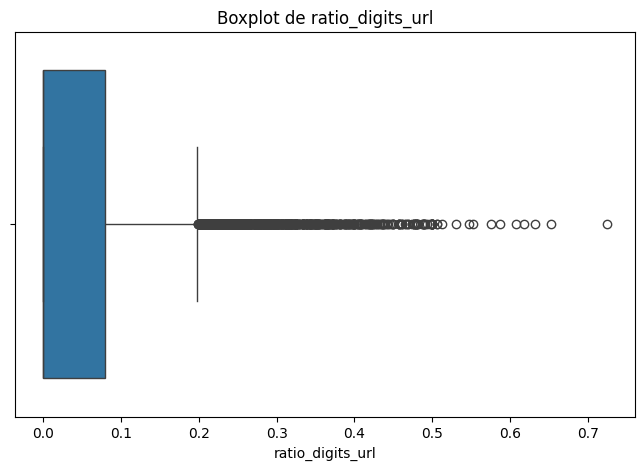

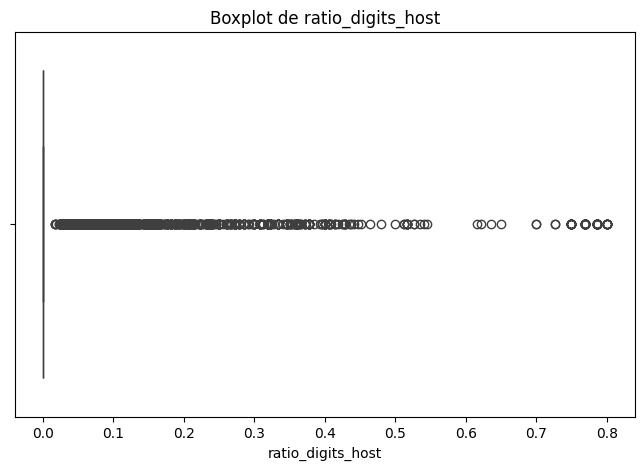

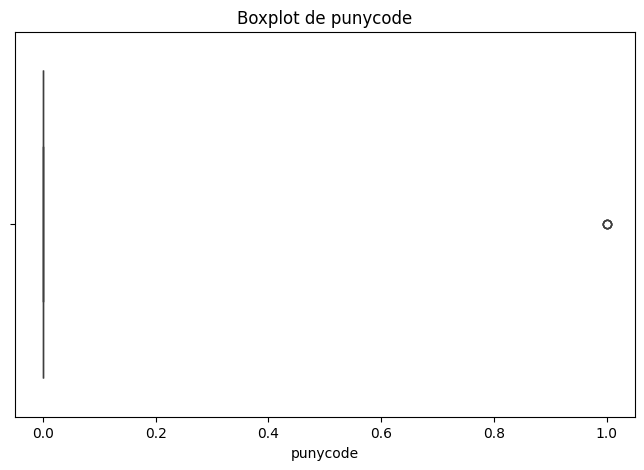

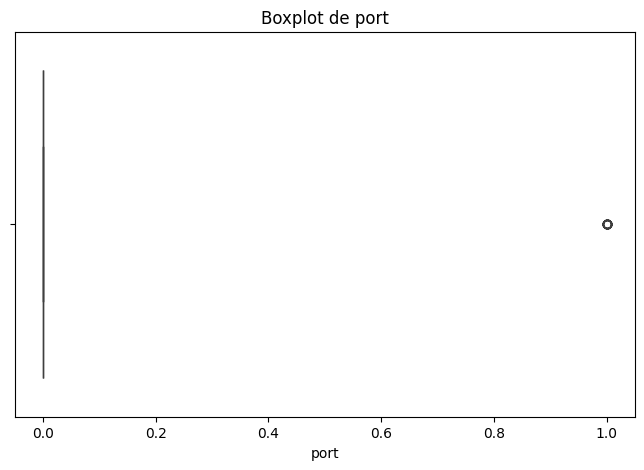

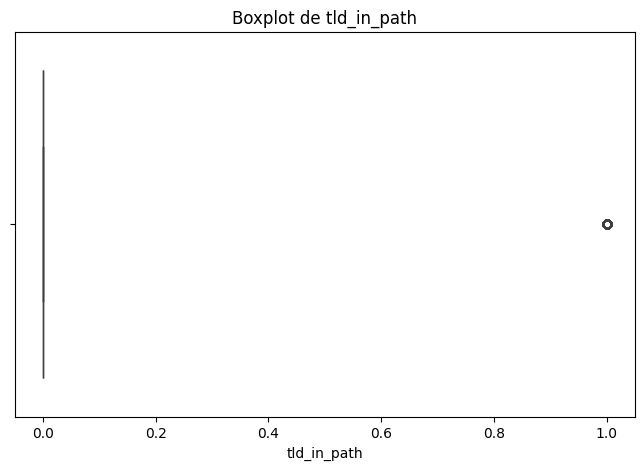

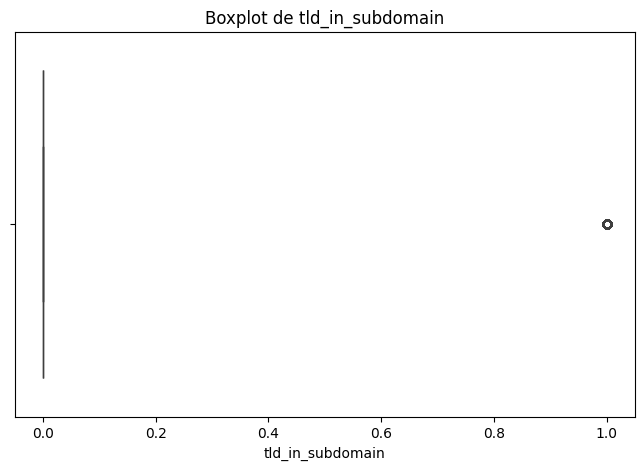

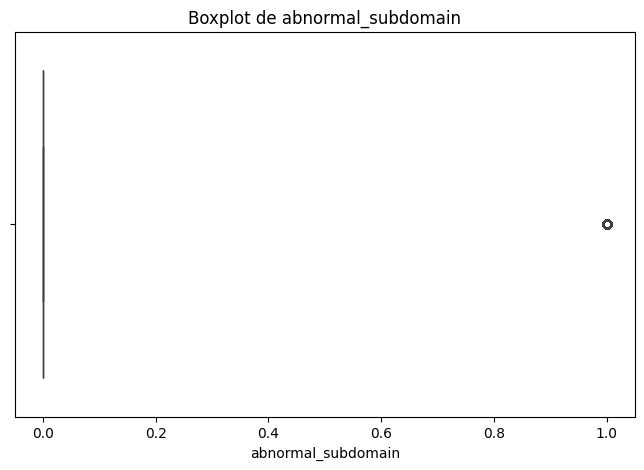

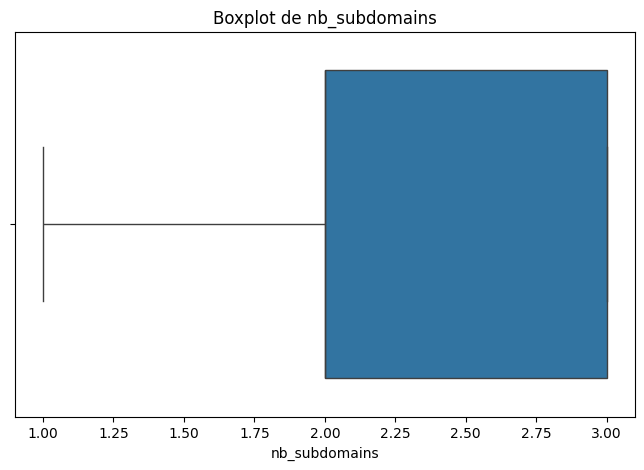

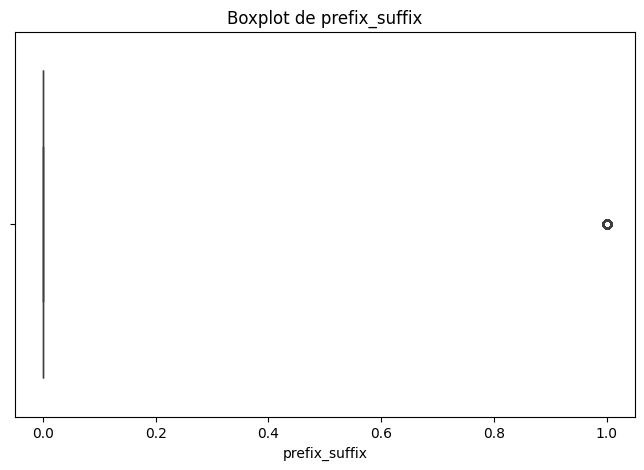

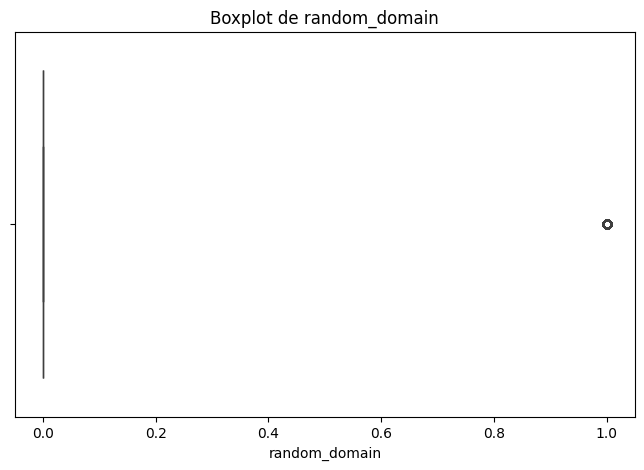

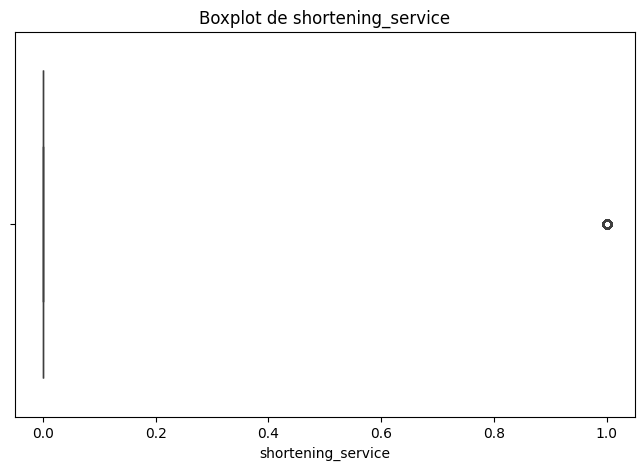

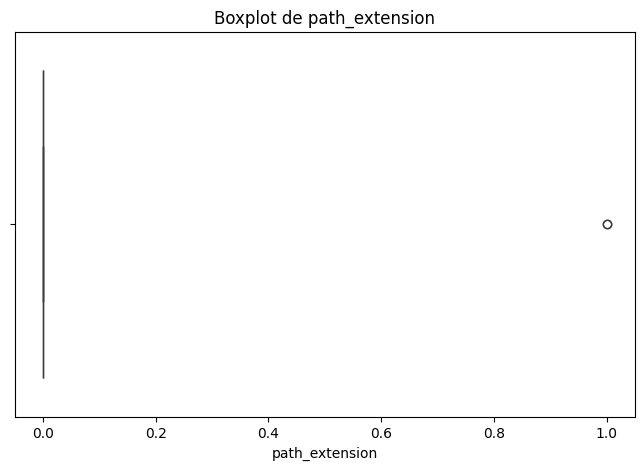

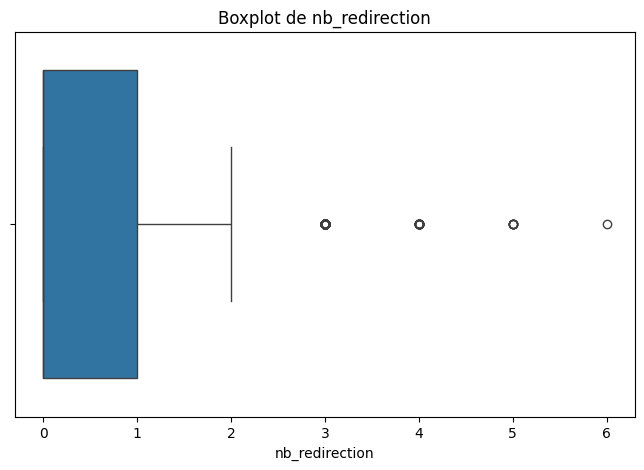

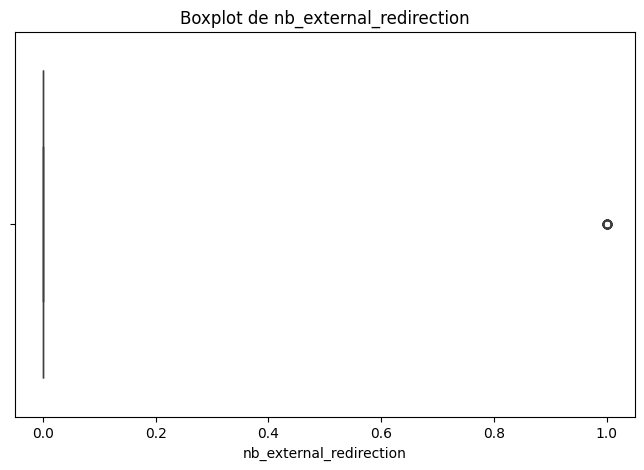

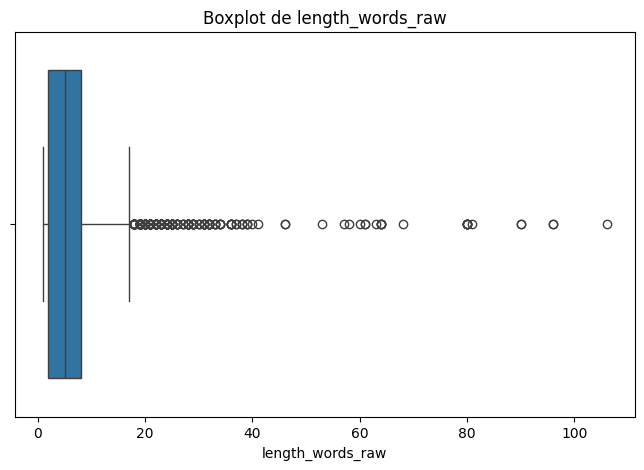

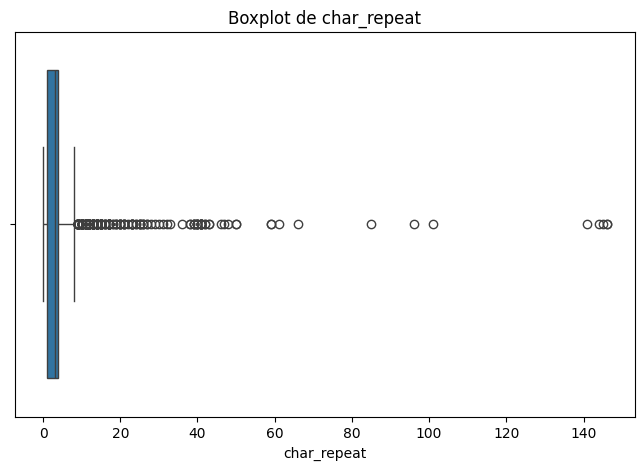

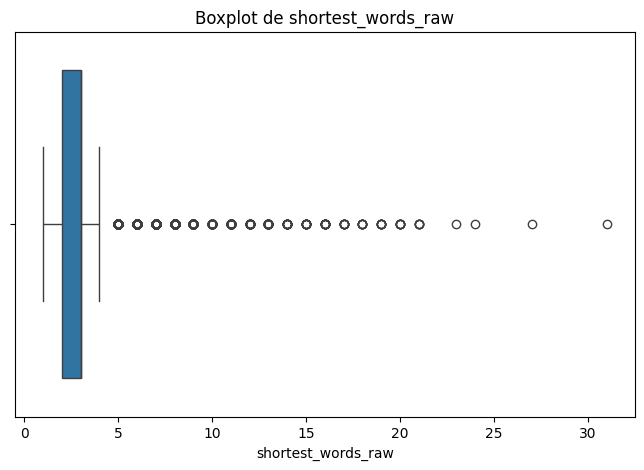

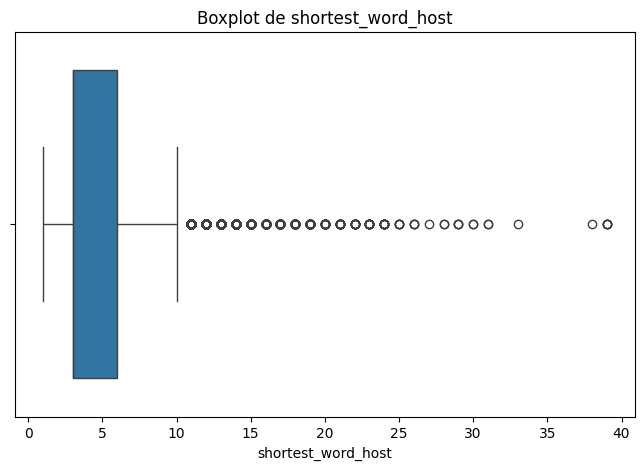

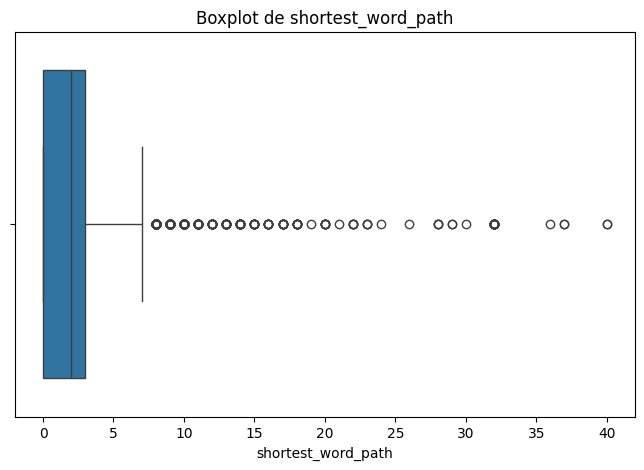

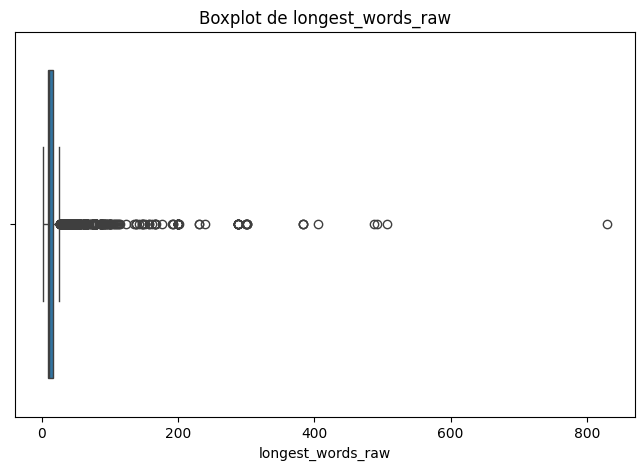

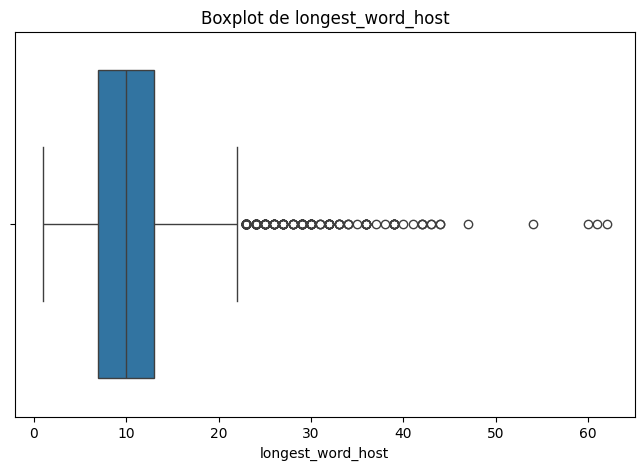

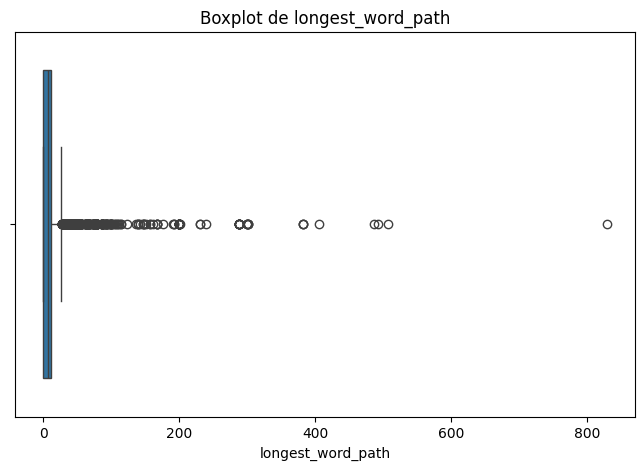

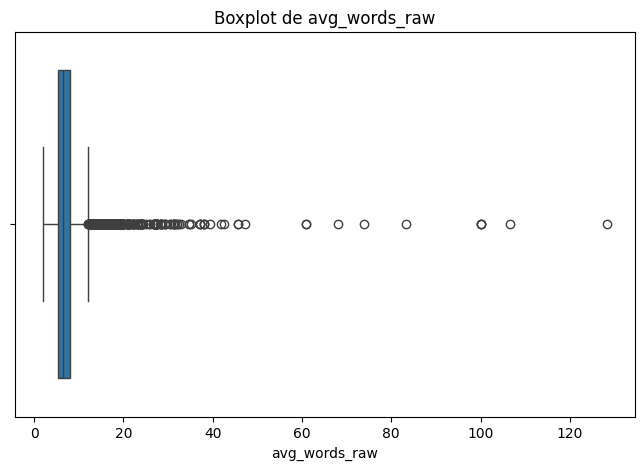

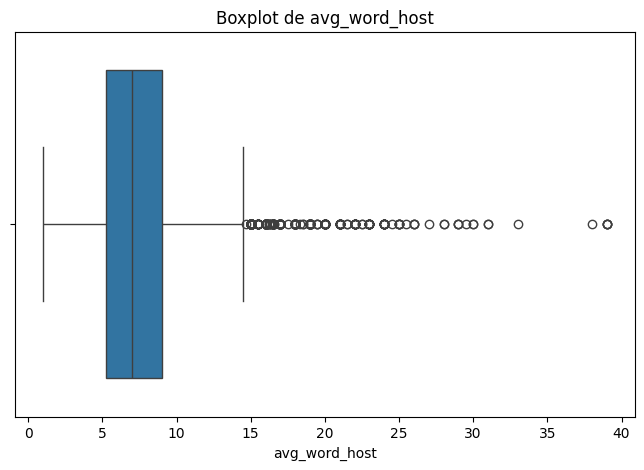

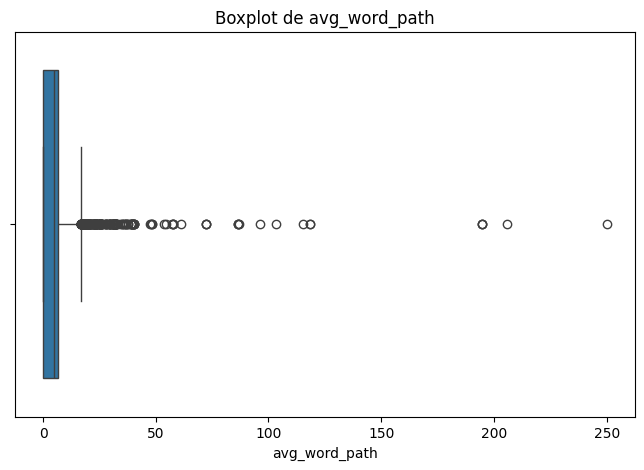

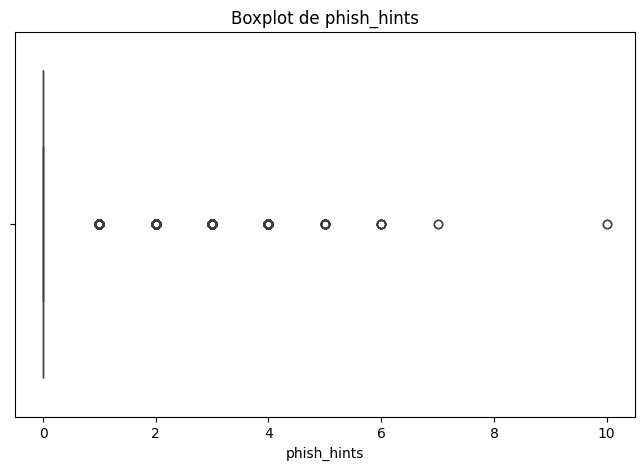

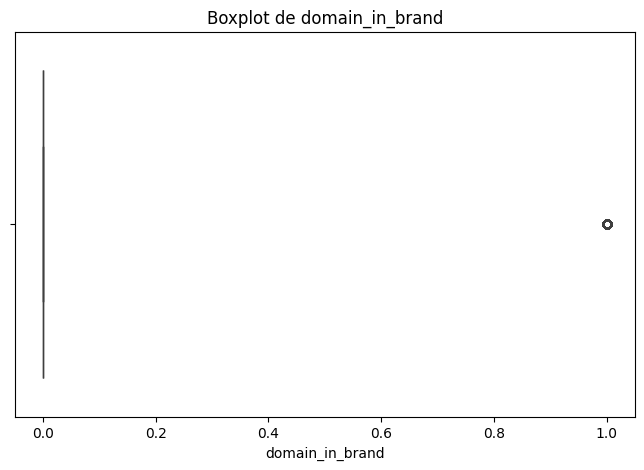

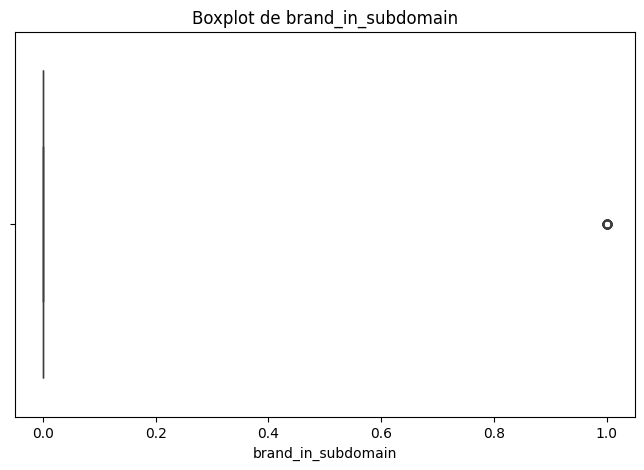

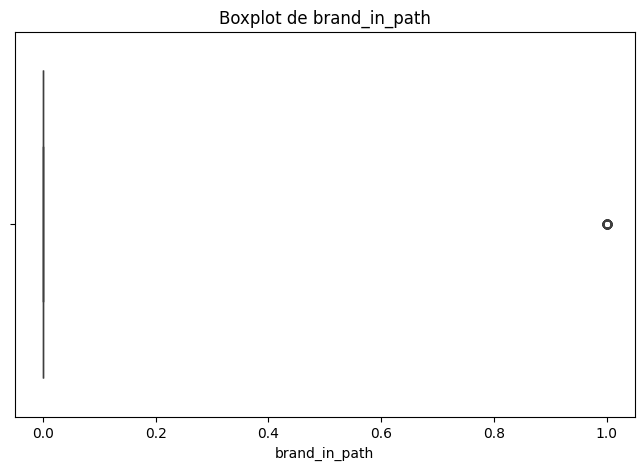

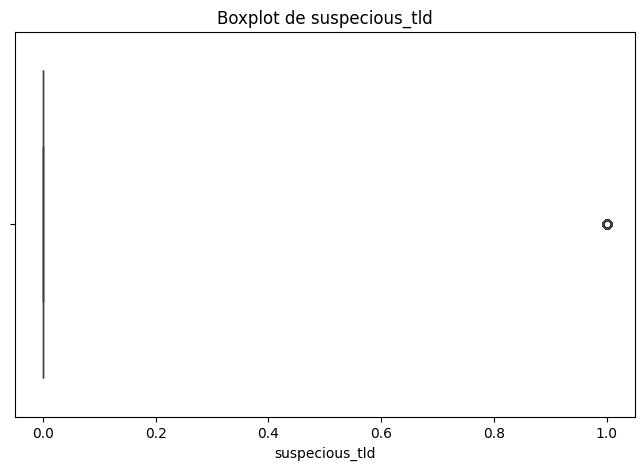

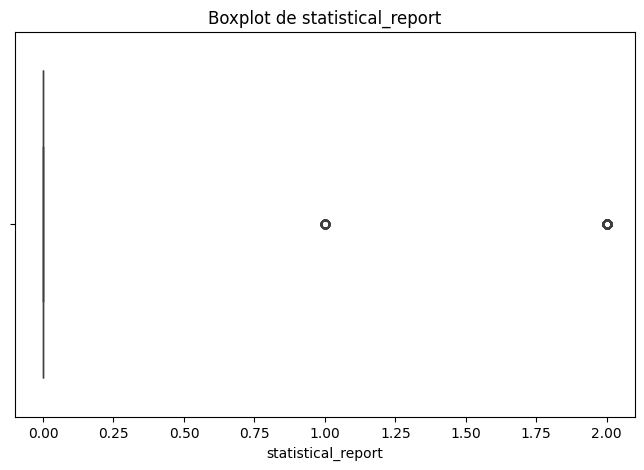

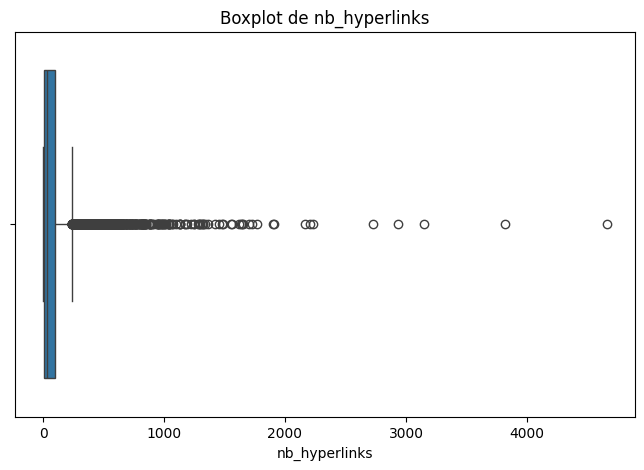

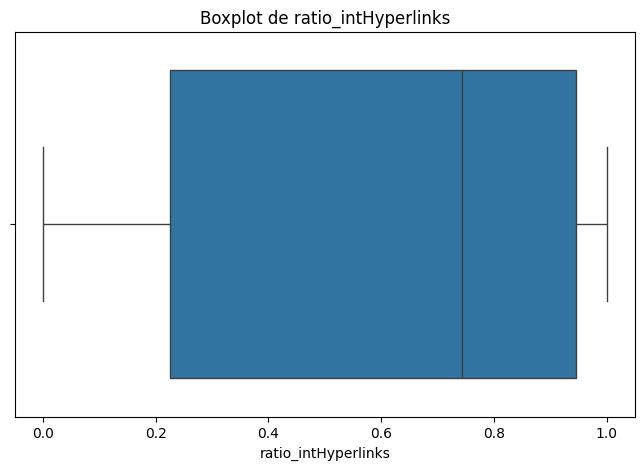

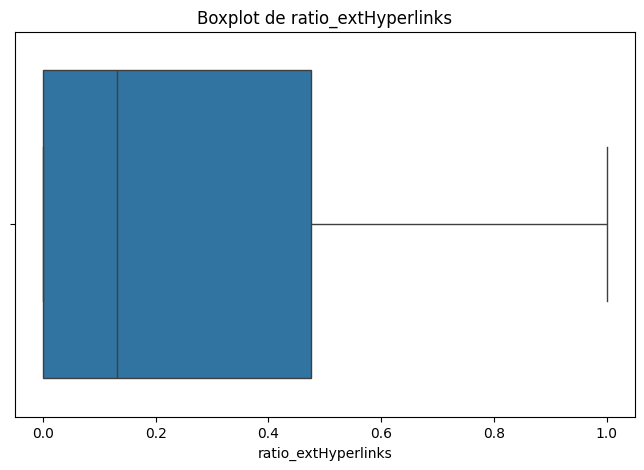

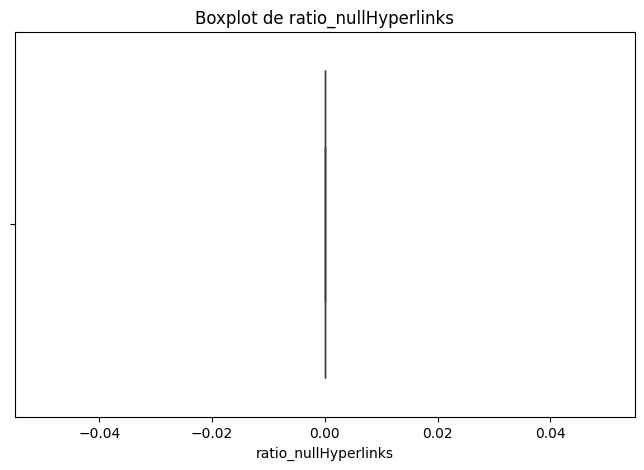

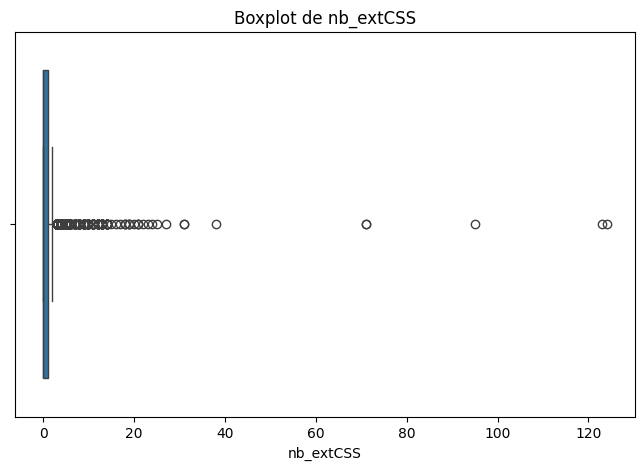

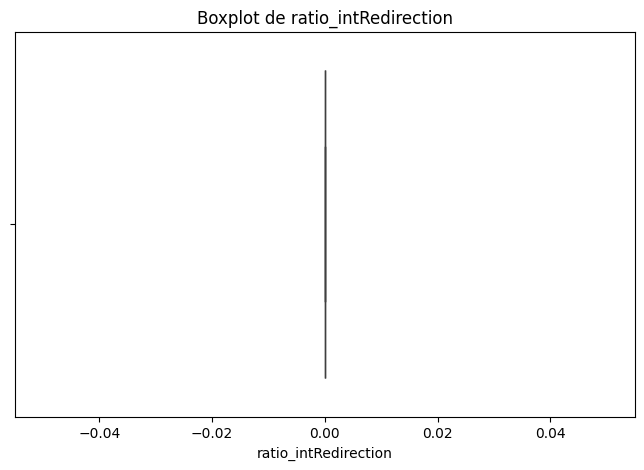

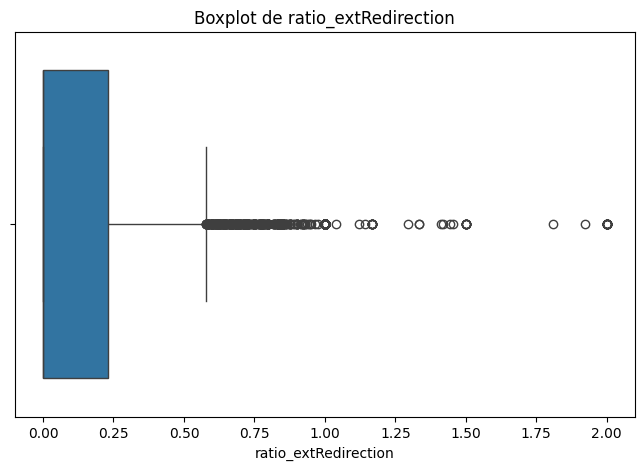

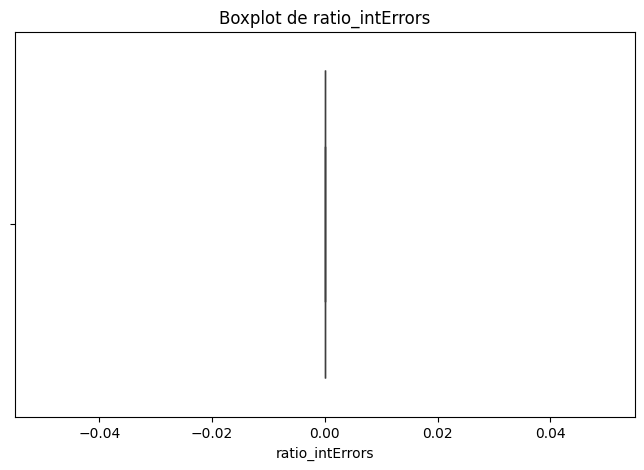

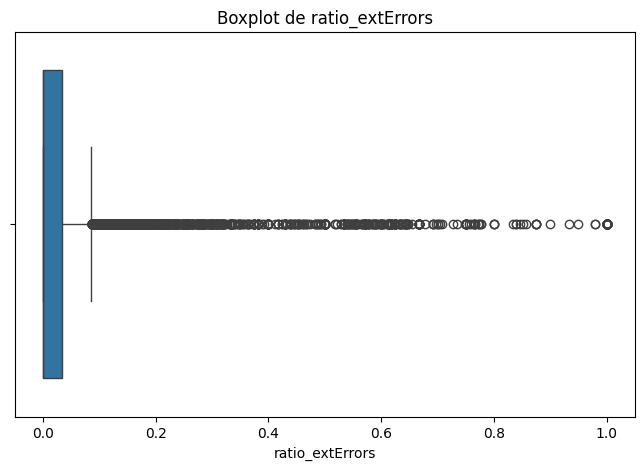

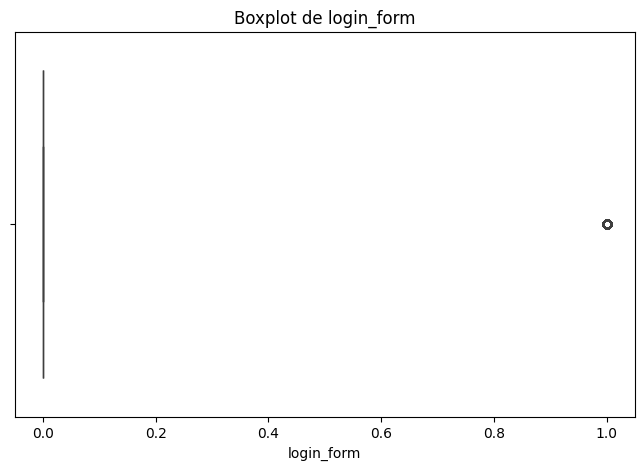

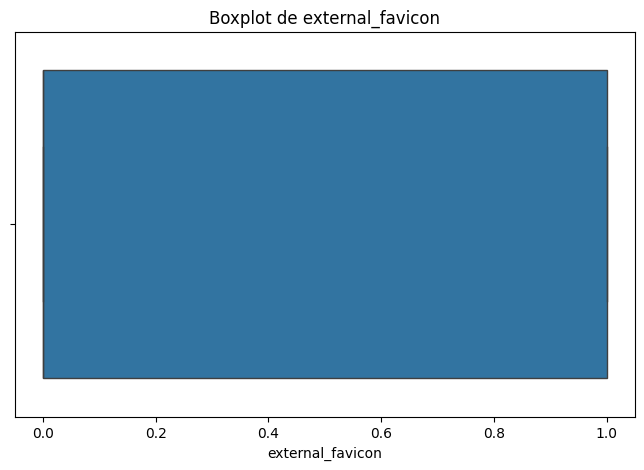

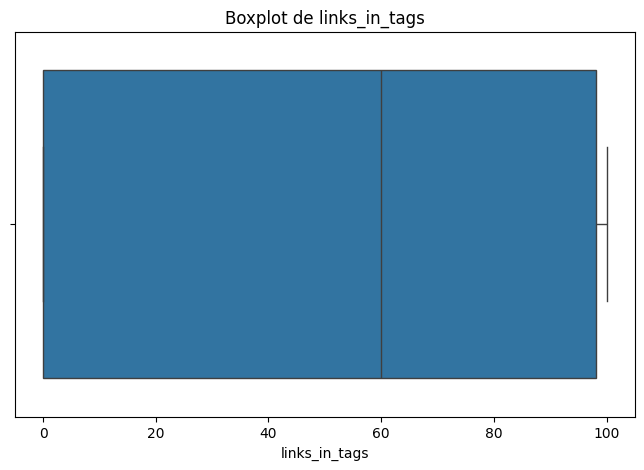

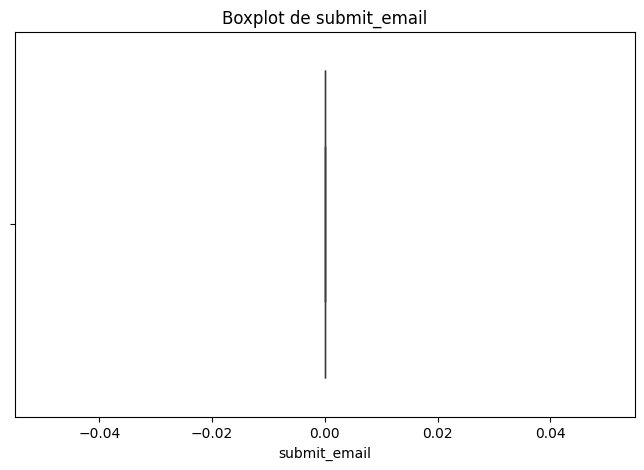

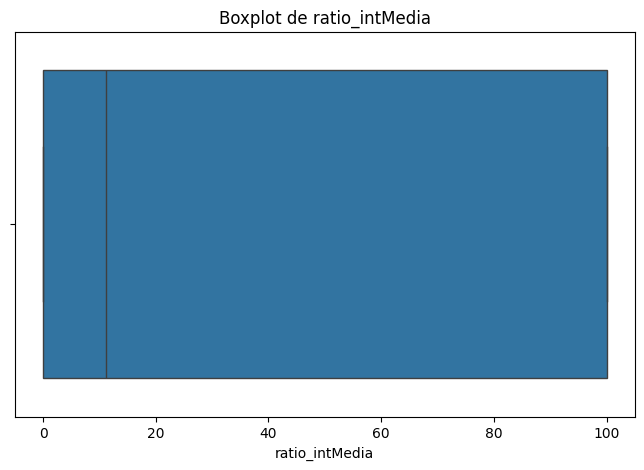

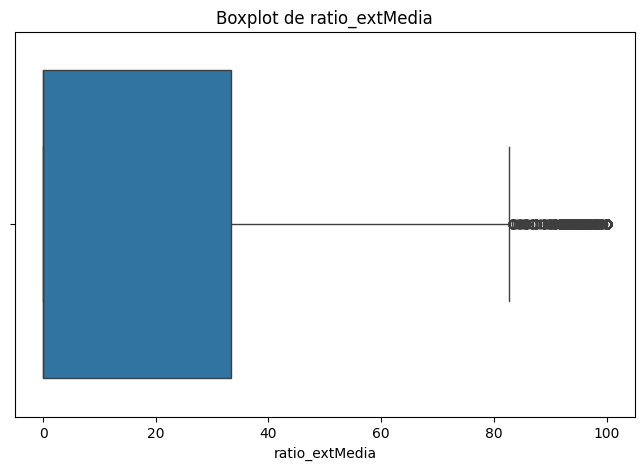

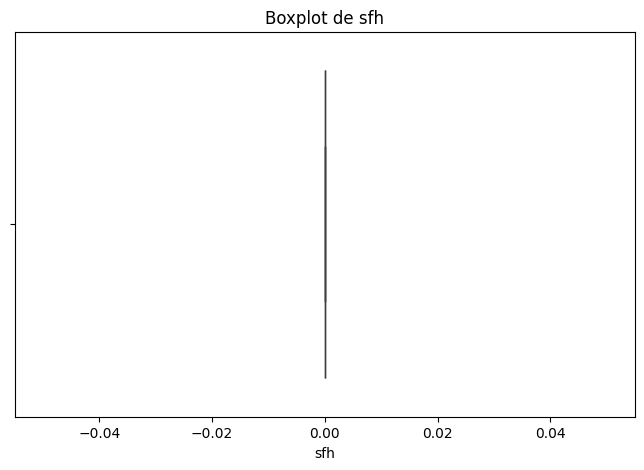

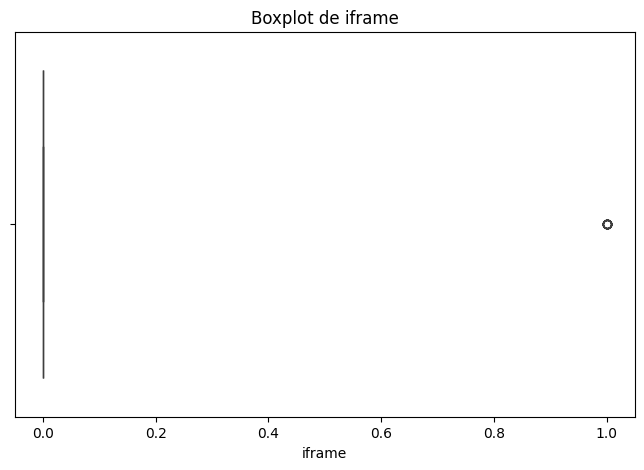

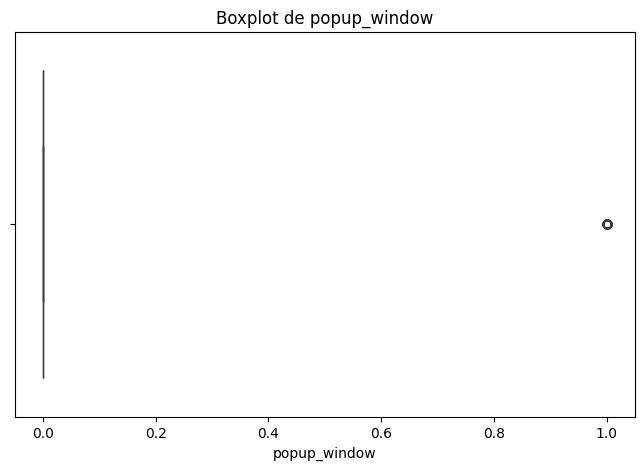

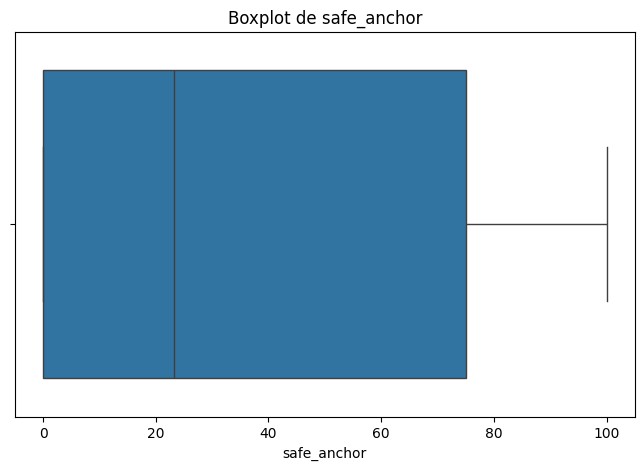

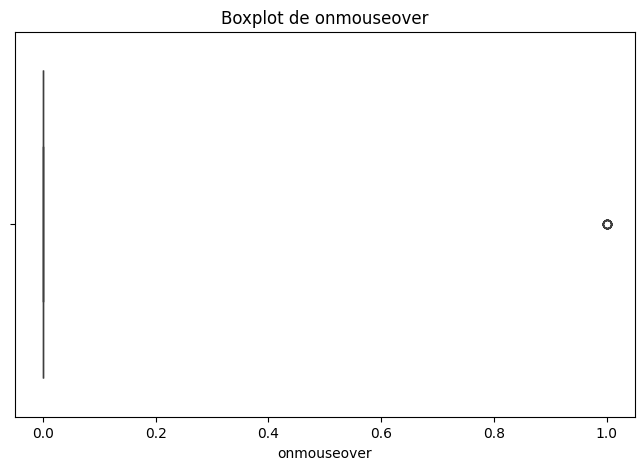

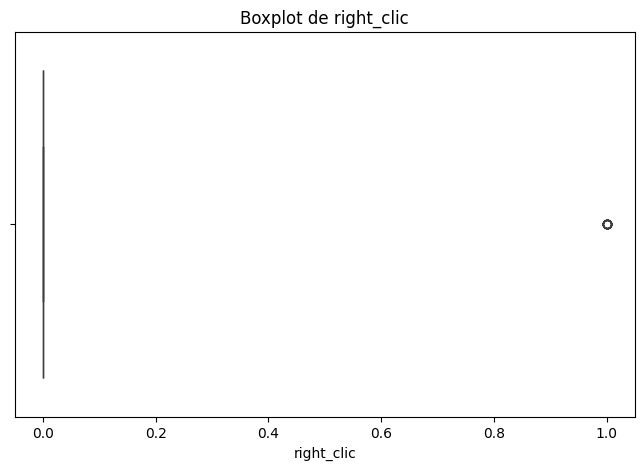

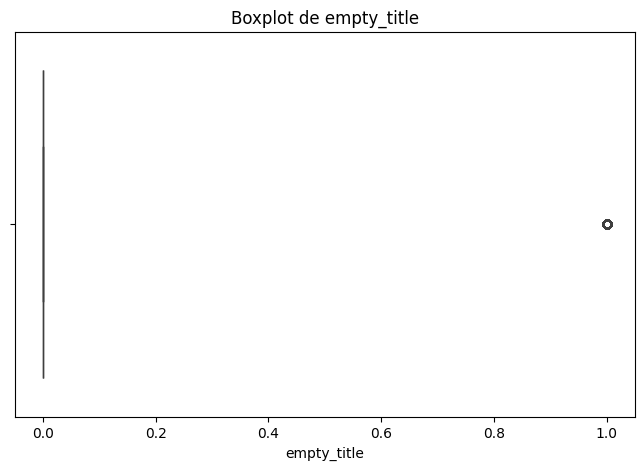

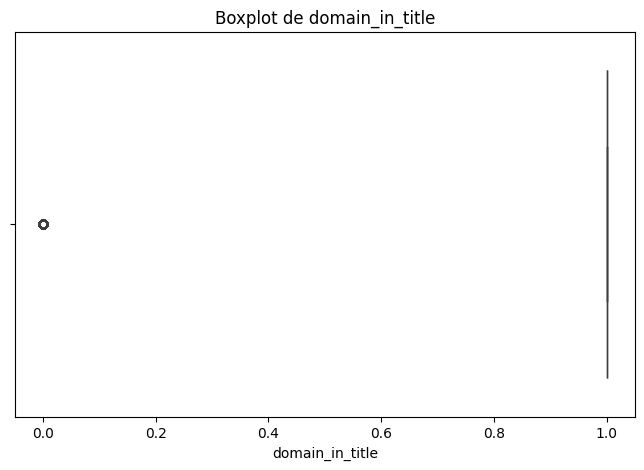

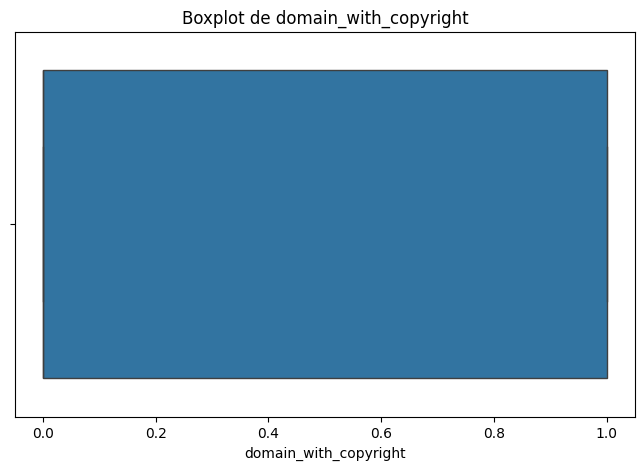

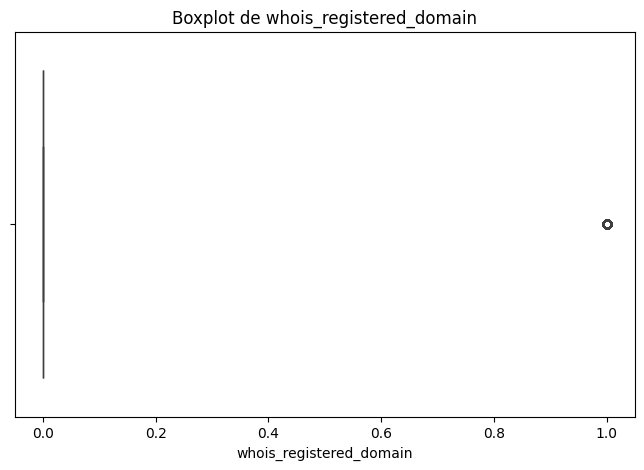

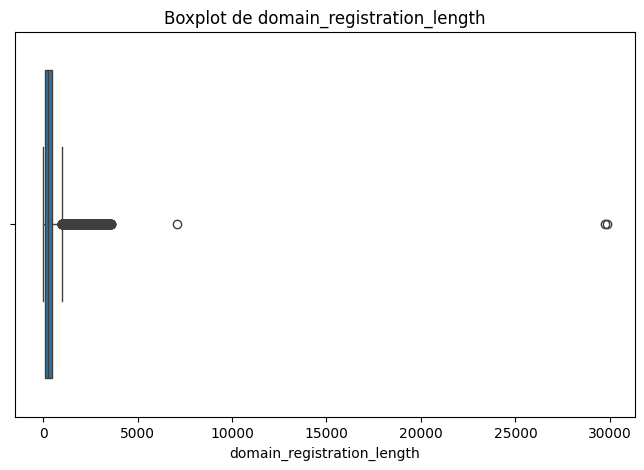

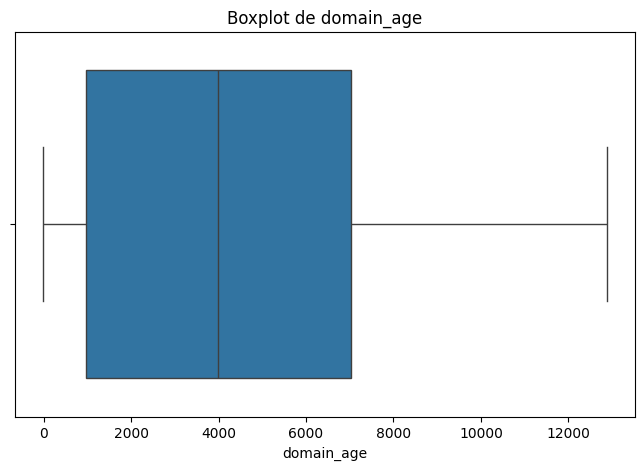

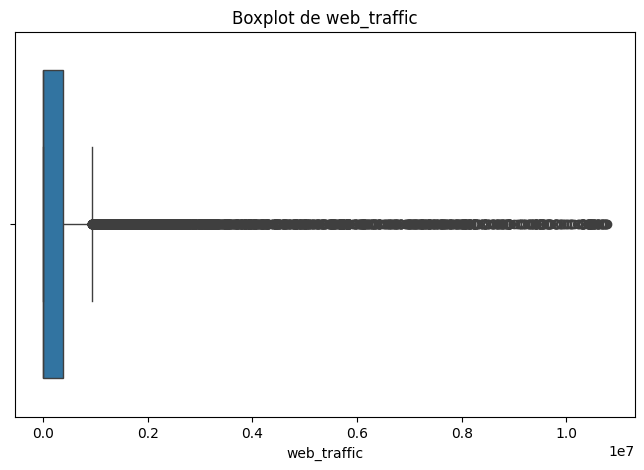

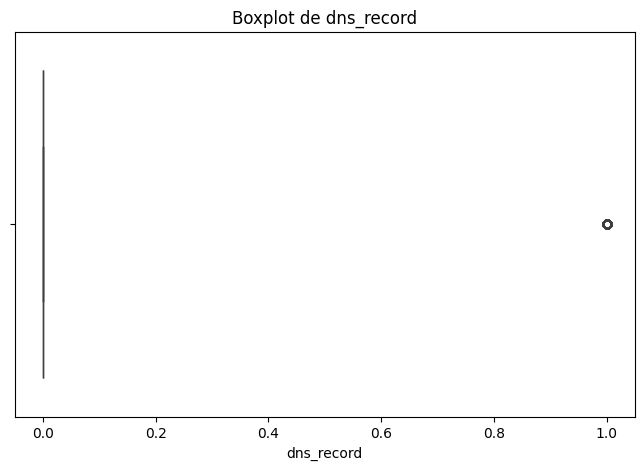

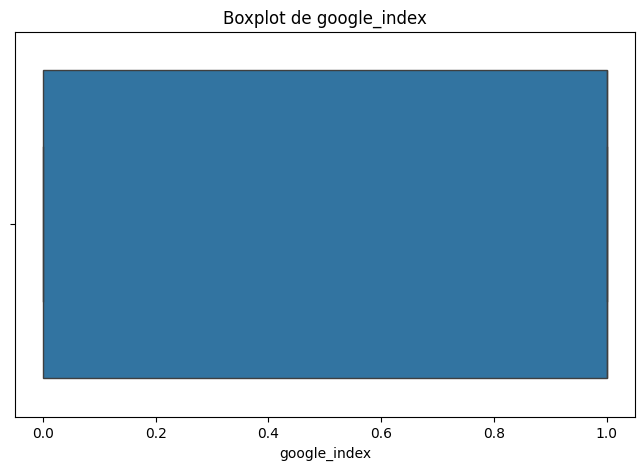

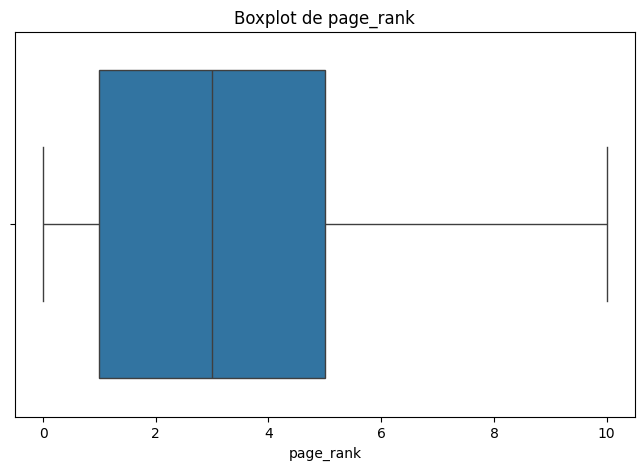

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_phishing.csv')

# 1. Verificar valores faltantes
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Gráfico de valores faltantes
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_df.index, y=missing_values_df['Percentage'])
plt.xticks(rotation=90)
plt.title("Porcentaje de Valores Faltantes por Columna")
plt.ylabel("Porcentaje")
plt.xlabel("Columnas")
plt.show()

# 2. Distribución de la variable objetivo (si existe)
if 'target' in data.columns:  # Cambia 'target' por el nombre real de tu variable objetivo
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data['target'])
    plt.title("Distribución de la Variable Objetivo")
    plt.xlabel("Clase")
    plt.ylabel("Frecuencia")
    plt.show()

# 3. Mapa de calor de correlaciones
# Filtrar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

if not numerical_data.empty:
    plt.figure(figsize=(12, 8))
    correlation_matrix = numerical_data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Mapa de Calor de Correlación")
    plt.show()
else:
    print("No hay columnas numéricas en el dataset para calcular la correlación.")

# 4. Distribución de características numéricas
for column in numerical_data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(numerical_data[column], kde=True, bins=30)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

# 5. Boxplots para detectar outliers
for column in numerical_data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=numerical_data[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()

# 6. Pairplot para visualizar relaciones (opcional, si no hay muchas columnas numéricas)
if len(numerical_data.columns) <= 5:
    sns.pairplot(numerical_data, diag_kind='kde', corner=True)
    plt.suptitle("Pairplot de Características Numéricas", y=1.02)
    plt.show()


In [ ]:
print(data.head())  # Primeras filas
print(data.info())  # Información general
print(data.describe())  # Estadísticas descriptivas

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [ ]:
# Verificar valores nulos
print(data.isnull().sum())
data = data.dropna()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [ ]:
# Verificar duplicados
print(f"Duplicados: {data.duplicated().sum()}")

# Eliminar duplicados
data = data.drop_duplicates()


Duplicados: 0


In [ ]:
# Cambiar nombres de columnas a minúsculas y eliminar espacios
data.columns = data.columns.str.lower().str.replace(' ', '_')
print(data.columns)


Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
print(data.columns)


Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_phishing.csv')

# 1. Verificar y tratar valores nulos (si los hubiera)
if data.isnull().sum().any():
    print("Valores nulos en las siguientes columnas:")
    print(data.isnull().sum())
    # Opcional: Llenar valores nulos con la media o eliminar filas
    data.fillna(data.mean(), inplace=True)  # Rellenar con la media

# 2. Codificar la columna objetivo ('status') usando LabelEncoder
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])  # 'legitimate' -> 0, 'phishing' -> 1

# 3. Separar características (X) y etiquetas (y)
X = data.drop(columns=['status', 'url'])  # Eliminar 'status' (objetivo) y 'url' (no útil para el modelo)
y = data['status']

# 4. Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Escalar las características numéricas con StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar datos de entrenamiento
X_test = scaler.transform(X_test)        # Transformar datos de prueba (sin ajustar)

# 6. Entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 8. Evaluar el rendimiento del modelo utilizando accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")

# 9. Verificar las primeras predicciones y etiquetas reales
print("Primeras predicciones:", y_pred[:10])
print("Primeras etiquetas reales:", y_test.values[:10])

# 10. Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# 11. Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))



Accuracy del modelo: 0.9694
Primeras predicciones: [0 0 0 0 1 0 1 0 0 0]
Primeras etiquetas reales: [0 0 0 0 1 0 1 0 0 0]
Matriz de confusión:
[[1130   27]
 [  43 1086]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.98      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



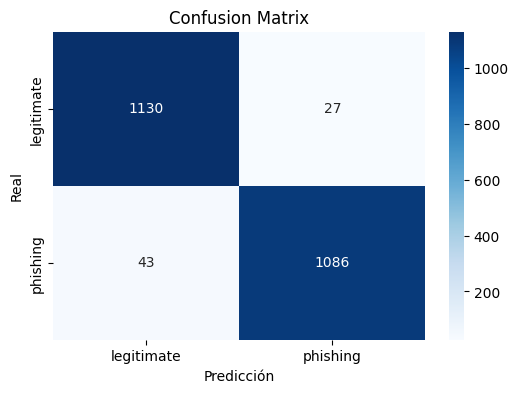

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()


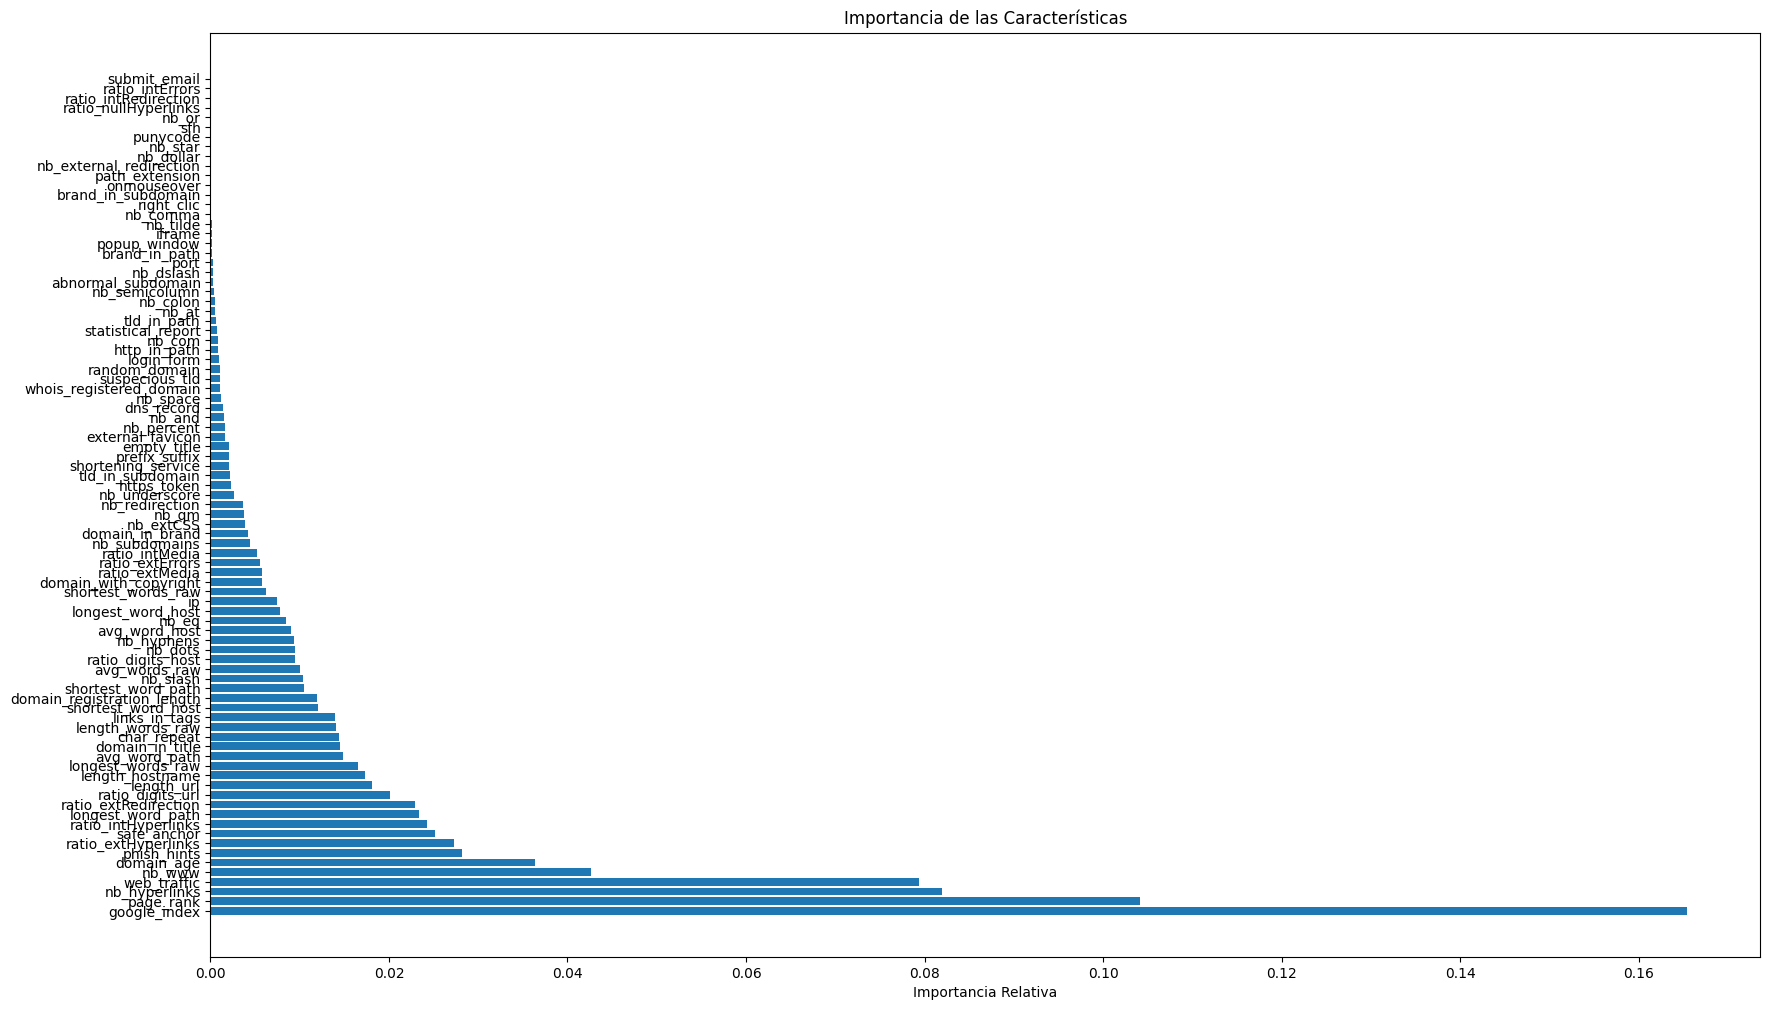

In [ ]:
importances = model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(20, 12))
plt.title('Importancia de las Características')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Importancia Relativa')
plt.show()


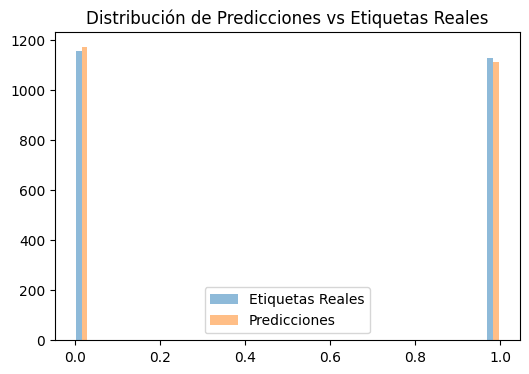

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist([y_test, y_pred], bins=30, alpha=0.5, label=['Etiquetas Reales', 'Predicciones'])
plt.legend(loc='best')
plt.title('Distribución de Predicciones vs Etiquetas Reales')
plt.show()


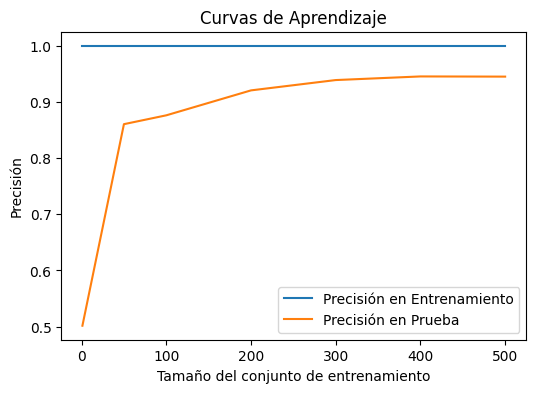

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=[1, 50, 100, 200, 300, 400, 500])

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Precisión en Entrenamiento')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Precisión en Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje')
plt.legend()
plt.show()


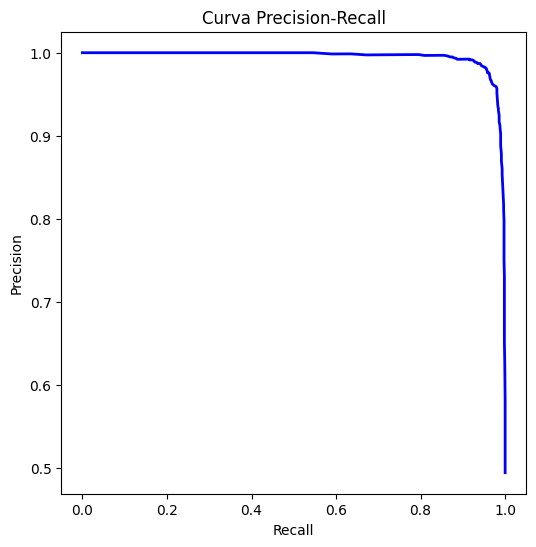

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)


Matriz de confusión:
[[1130   27]
 [  43 1086]]


In [ ]:
from sklearn.metrics import classification_report

# Obtener el reporte completo de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.98      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



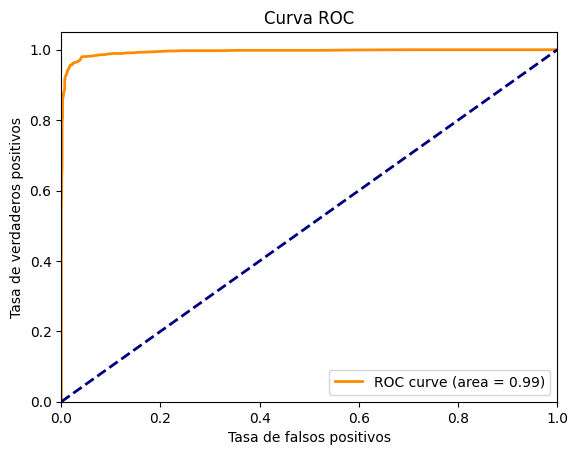

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades de predicción
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1 ('phishing')

# Calcular FPR, TPR y AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import joblib

# Guardar el modelo entrenado
joblib.dump(model, 'random_forest_model.pkl')

# Guardar el scaler utilizado para la normalización
joblib.dump(scaler, 'scaler.pkl')

print("Modelo y scaler guardados exitosamente.")


Modelo y scaler guardados exitosamente.


In [ ]:
import joblib

# Cargar el modelo entrenado y el scaler guardado
model = joblib.load('random_forest_model.pkl')  # Ruta al modelo guardado
scaler = joblib.load('scaler.pkl')  # Ruta al scaler guardado

print("Modelo y scaler cargados exitosamente.")


Modelo y scaler cargados exitosamente.


In [ ]:
import pandas as pd

# Cargar el archivo CSV
data = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_phishing.csv')

# Ver las primeras filas del archivo
print(data.head())

# Ver las columnas del DataFrame
print(data.columns)



                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [ ]:
# Suponiendo que estas son las columnas que se usaron durante el entrenamiento
columns_order = ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and',
                 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star',
                 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
                 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
                 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
                 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection',
                 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw',
                 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host',
                 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
                 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report',
                 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks',
                 'nb_extCSS', 'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors',
                 'login_form', 'external_favicon', 'links_in_tags', 'submit_email', 'ratio_intMedia', 'ratio_extMedia',
                 'sfh', 'iframe', 'popup_window', 'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
                 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'domain_registration_length',
                 'domain_age', 'web_traffic', 'dns_record', 'google_index', 'page_rank']  # Aquí deberías tener todas tus columnas

# Reordenamos las columnas
data = data[columns_order]

# Verificar que las columnas estén en el orden correcto
print(data.head())


   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   
2         126               50   1        4           1      0      1       2   
3          18               11   0        2           0      0      0       0   
4          55               15   0        2           2      0      0       0   

   nb_or  nb_eq  ...  empty_title  domain_in_title  domain_with_copyright  \
0      0      0  ...            0                0                      1   
1      0      0  ...            0                1                      0   
2      0      3  ...            0                1                      0   
3      0      0  ...            0                1                      0   
4      0      0  ...            0                0                      1   

   whois_registered_domain  domain_registration_le

In [ ]:
import joblib

# Cargar el scaler guardado
scaler = joblib.load('scaler.pkl')

# Escalar las características
scaled_features = scaler.transform(data)

# Verifica que las características estén escaladas correctamente
print(scaled_features[:5])


[[-4.30541255e-01 -1.95242599e-01 -4.22854868e-01  3.69780620e-01
  -4.80158332e-01 -1.42640250e-01 -3.90726339e-01 -1.97453910e-01
   0.00000000e+00 -2.92555989e-01 -2.90146339e-01 -8.26237869e-02
  -8.32757543e-02 -6.82960018e-01 -2.76787968e-02 -1.16776991e-01
  -3.77875565e-02 -1.05630388e-01 -2.35539540e-02 -1.06931947e-01
   1.10508089e+00 -3.35581866e-01 -8.05867312e-02 -1.00497437e-01
   7.93874750e-01 -5.93784397e-01 -2.68637500e-01 -1.04581686e-02
  -4.91095898e-02 -2.64526477e-01 -2.26442389e-01 -1.46450405e-01
   1.20006373e+00 -5.09756019e-01 -3.03449652e-01 -3.76640600e-01
  -1.47908928e-02 -7.24365304e-01 -5.33994618e-02 -3.97756222e-01
   2.21513557e-01 -5.51799429e-02 -5.11586381e-01  1.97641089e-01
  -1.97081417e-01  1.04560994e-01 -1.95331914e-01 -3.56811085e-01
  -1.89746041e-01 -8.39297651e-02 -3.89807095e-01 -3.41895649e-01
  -6.37401665e-02 -7.03249488e-02 -1.35558884e-01 -1.78930056e-01
  -4.13667520e-01 -1.89810258e-01  6.01798458e-01  0.00000000e+00
  -2.78237

In [ ]:
import pandas as pd
import joblib

# Cargar el CSV con las características pre-calculadas
data = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_phishing.csv')

# Verificar que la columna 'url' esté presente
print(data.columns)

# Si la columna 'url' está presente, asegúrate de agregarla al reordenar las columnas
columns_order = ['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm',
                 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash',
                 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www',
                 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
                 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
                 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection',
                 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw',
                 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host',
                 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
                 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report',
                 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks',
                 'nb_extCSS', 'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors',
                 'login_form', 'external_favicon', 'links_in_tags', 'submit_email', 'ratio_intMedia', 'ratio_extMedia',
                 'sfh', 'iframe', 'popup_window', 'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
                 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'domain_registration_length',
                 'domain_age', 'web_traffic', 'dns_record', 'google_index', 'page_rank']  # Asegúrate de incluir todas las columnas

# Reordenar las columnas para asegurarse de que están en el mismo orden que durante el entrenamiento
data = data[columns_order]

# Cargar el scaler guardado
scaler = joblib.load('scaler.pkl')

# Escalar las características
scaled_features = scaler.transform(data.drop(columns=['url']))  # Excluimos 'url' de las características

# Cargar el modelo entrenado
model = joblib.load('random_forest_model.pkl')

# Realizar las predicciones
predictions = model.predict(scaled_features)

# Agregar las predicciones al DataFrame original
data['prediction'] = predictions

# Mostrar la URL junto con la predicción (0 o 1)
result = data[['url', 'prediction']]

# Mostrar las primeras filas con la URL y su predicción
print(result.head())



Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

Entrenando y evaluando: Logistic Regression
Accuracy: 0.9558
Tiempo de entrenamiento: 0.64 segundos
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1157
           1       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286

--------------------------------------------------
Entrenando y evaluando: Random Forest
Accuracy: 0.9694
Tiempo de entrenamiento: 6.43 segundos
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.98      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

--------------------------------------------------
Entrenando y evaluando: SVM
Accuracy: 0.9628
Tiemp

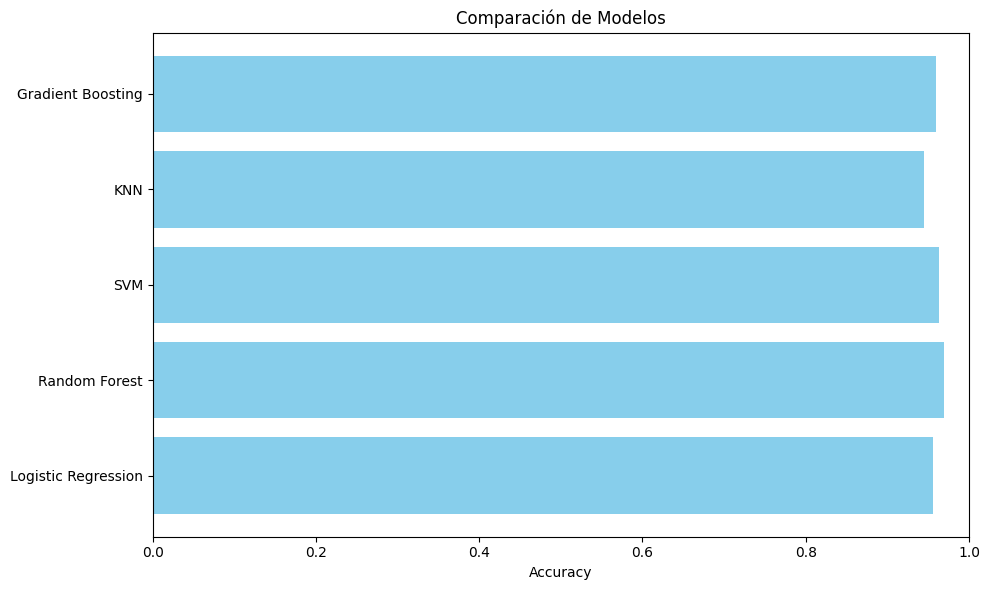

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time
import matplotlib.pyplot as plt

# Lista de modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Diccionario para almacenar resultados
results = {}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    print(f"Entrenando y evaluando: {model_name}")
    start_time = time.time()

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluar
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Tiempo de entrenamiento: {time.time() - start_time:.2f} segundos")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Comparación de resultados
print("\nComparación de modelos:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Comparación gráfica
model_names = list(results.keys())
accuracies = list(results.values())

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparación de Modelos')
plt.xlim(0, 1)  # Rango de precisión entre 0 y 1
plt.tight_layout()
plt.show()


Accuracy del modelo: 0.9694
Primeras predicciones: [0 0 0 0 1 0 1 0 0 0]
Primeras etiquetas reales: [0 0 0 0 1 0 1 0 0 0]
Matriz de confusión:
[[1130   27]
 [  43 1086]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.98      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



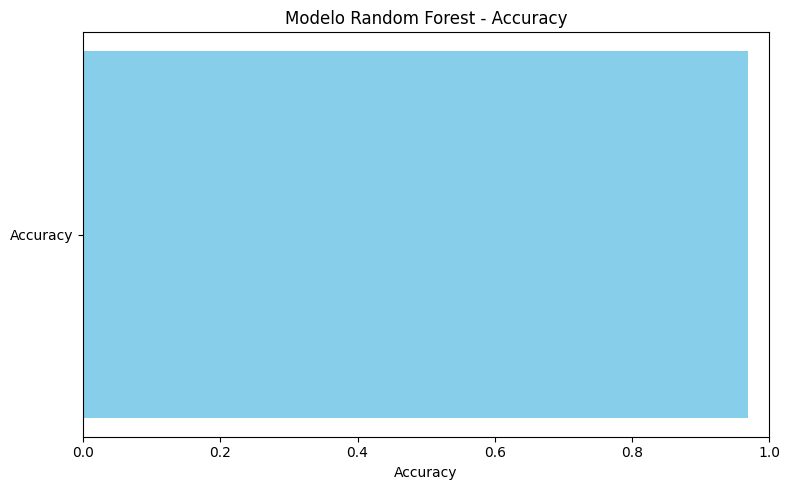

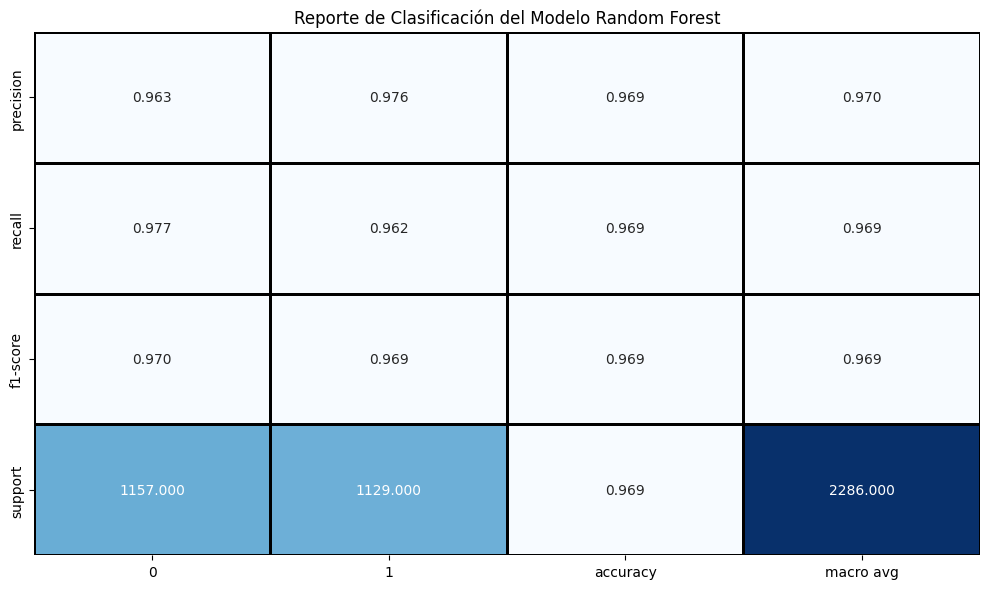

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_phishing.csv')

# 1. Verificar y tratar valores nulos (si los hubiera)
if data.isnull().sum().any():
    print("Valores nulos en las siguientes columnas:")
    print(data.isnull().sum())
    # Opcional: Llenar valores nulos con la media o eliminar filas
    data.fillna(data.mean(), inplace=True)  # Rellenar con la media

# 2. Codificar la columna objetivo ('status') usando LabelEncoder
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])  # 'legitimate' -> 0, 'phishing' -> 1

# 3. Separar características (X) y etiquetas (y)
X = data.drop(columns=['status', 'url'])  # Eliminar 'status' (objetivo) y 'url' (no útil para el modelo)
y = data['status']

# 4. Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Escalar las características numéricas con StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar datos de entrenamiento
X_test = scaler.transform(X_test)        # Transformar datos de prueba (sin ajustar)

# 6. Entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 8. Evaluar el rendimiento del modelo utilizando accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")

# 9. Verificar las primeras predicciones y etiquetas reales
print("Primeras predicciones:", y_pred[:10])
print("Primeras etiquetas reales:", y_test.values[:10])

# 10. Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# 11. Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# ============================================
# 12. Crear gráfico de accuracy
plt.figure(figsize=(8, 5))
plt.barh(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Modelo Random Forest - Accuracy')
plt.xlim(0, 1)  # Limitar el rango de la precisión de 0 a 1
plt.tight_layout()
plt.show()

# ============================================
# 13. Mostrar el reporte de clasificación en formato tabla

# Crear un DataFrame con los resultados del reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Mostrar la tabla en un gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.3f', cbar=False, linewidths=1, linecolor='black')
plt.title('Reporte de Clasificación del Modelo Random Forest')
plt.tight_layout()
plt.show()
